# Machine learning project - classification of telecommunitaction data
## Autor: Jadwiga Słowik

In [4]:
import pandas as pd
import numpy as np

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [5]:
df = pd.read_csv("./Documents/studia/ML-telecommunication-classification/train.txt", header=0, sep=" ")
test = pd.read_csv("./Documents/studia/ML-telecommunication-classification/testx.txt", header=0, sep=" ")
observations_num, columns_num = df.shape
X = df.iloc[:,0:(columns_num-1)]
y = df.iloc[:, columns_num-1]

In [6]:
X.shape

(40000, 230)

In [7]:
X.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10',
       ...
       'Var221', 'Var222', 'Var223', 'Var224', 'Var225', 'Var226', 'Var227',
       'Var228', 'Var229', 'Var230'],
      dtype='object', length=230)

# Data analysis

In [8]:
df.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230,class
count,569.000000,969.000000,968.000000,1262.000000,1.203000e+03,35603.000000,35591.000000,0.0,569.000000,1.203000e+03,...,969.000000,0.0,569.000000,569.000000,969.000000,16884.000000,266.000000,0.0,0.0,40000.000000
mean,10.896309,0.005160,461.135331,0.114105,2.434816e+05,1314.888549,6.812368,NaN,47.546573,3.803626e+05,...,7.925697,NaN,3.100176,16.333919,168.028483,270.198650,22923.445602,NaN,NaN,0.073275
std,35.031447,0.160623,4605.849904,1.287273,6.485677e+05,2550.287869,6.334275,NaN,147.704543,8.746956e+05,...,35.727542,NaN,8.181404,55.322940,114.190795,86.545162,30864.349212,NaN,NaN,0.260591
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000,NaN,0.000000,0.000000,0.000000,6.000000,0.000000,NaN,NaN,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,2.000000,0.000000e+00,...,0.000000,NaN,0.000000,0.000000,19.380000,204.000000,2809.507500,NaN,NaN,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,18.000000,0.000000e+00,...,0.000000,NaN,0.000000,4.000000,199.860000,270.000000,12756.465000,NaN,NaN,0.000000
75%,8.000000,0.000000,0.000000,0.000000,1.209000e+05,1428.000000,7.000000,NaN,46.000000,2.565675e+05,...,8.000000,NaN,0.000000,14.000000,256.680000,324.000000,32008.747500,NaN,NaN,0.000000
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,6.704406e+06,...,1000.000000,NaN,78.000000,910.000000,628.620000,642.000000,230427.000000,NaN,NaN,1.000000


In [9]:
columns_df = pd.DataFrame({
    "non_na_count": df.count().values,
    "col_type": df.dtypes.values,
    "unique_categories": [len(df[col].unique()) for col in df.columns]
}, index=df.columns)

columns_df = columns_df \
    .assign(non_na_percentage = columns_df.non_na_count / observations_num) \
    .sort_values(["non_na_percentage", "unique_categories"], ascending=False)

In [10]:
columns_df

,col_type,non_na_count,unique_categories,non_na_percentage
Var113,float64,40000,38904,1.000000
Var57,float64,40000,23019,1.000000
Var198,object,40000,3876,1.000000
Var220,object,40000,3876,1.000000
Var222,object,40000,3876,1.000000
Var216,object,40000,1834,1.000000
Var73,int64,40000,131,1.000000
Var204,object,40000,100,1.000000
Var212,object,40000,80,1.000000
Var193,object,40000,51,1.000000


In [11]:
chosen_columns = columns_df.loc[columns_df.non_na_percentage >= 0.7].index.values

In [12]:
len(chosen_columns)

68

## List unique categories for each column

In [13]:
for col in X.columns:
    print("---------------------")
    print("col: {0}".format(col))
    categories = X[col].unique()
    print(categories.tolist())
    print("total categories num: {0}".format(len(categories)))

---------------------
col: Var1
[nan, 8.0, 0.0, 16.0, 24.0, 40.0, 32.0, 360.0, 48.0, 128.0, 64.0, 120.0, 56.0, 72.0, 536.0, 80.0, 152.0, 392.0]
total categories num: 18
---------------------
col: Var2
[nan, 0.0, 5.0]
total categories num: 3
---------------------
col: Var3
[nan, 0.0, 231.0, 9.0, 84.0, 744.0, 3.0, 180.0, 27.0, 633.0, 1332.0, 321.0, 13662.0, 189.0, 228.0, 102.0, 198.0, 225.0, 6126.0, 2895.0, 123.0, 5136.0, 3987.0, 18.0, 129.0, 534.0, 105.0, 12.0, 99.0, 144.0, 3168.0, 1113.0, 60.0, 7413.0, 1242.0, 7188.0, 405.0, 147.0, 333.0, 120.0, 969.0, 36.0, 19683.0, 9012.0, 417.0, 21.0, 10617.0, 90.0, 156.0, 9399.0, 138.0, 1740.0, 75.0, 1644.0, 18066.0, 6.0, 567.0, 96.0, 45.0, 153.0, 126.0, 165.0, 4866.0, 693.0, 48.0, 12633.0, 600.0, 540.0, 498.0, 525.0, 3882.0, 33.0, 72.0, 81.0, 246.0, 15.0, 777.0, 1155.0, 39.0, 22461.0, 336.0, 306.0, 117.0, 63.0, 2517.0, 30.0, 327.0, 22026.0, 177.0, 51.0, 369.0, 135.0, 18195.0, 3321.0, 24.0, 219.0, 234.0, 3819.0, 465.0, 93.0, 951.0, 183.0, 486.0, 19

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Get one-class percentage of each unique value for each column

In [14]:
def get_class_one_percentage(s):
    if 1 in s.index.tolist() and 0 in s.index.tolist():
        return s[1] / (s[0] + s[1])
    elif 1 in s.index.tolist():
        return 1.0
    else:
        return 0.0
    
def factor_encode_feature(df, feature_name):
    class_counts = [
        (key, group["class"].value_counts())
        for key, group in
            df.loc[:, [feature_name, "class"]].groupby([feature_name])
    ]
    
    probabilities_dict = dict(
        [(key, get_class_one_percentage(value_counts))
        for key, value_counts in class_counts]
    )
    
    res = df.copy()
    res[feature_name] = [probabilities_dict[elem] for elem in res[feature_name]]
    return res

In [15]:
rr = factor_encode_feature(df, "Var113")

In [16]:
rr.Var113.value_counts()

0.000000    36304
1.000000     2843
0.054018      759
0.500000       94
Name: Var113, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 29652 to 25277
Columns: 231 entries, Var1 to class
dtypes: float64(191), int64(2), object(38)
memory usage: 70.8+ MB


In [18]:
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
def plot_histogram(col):
    plt.figure(figsize=(15,8))
    plt.title(columns_df.loc[[col], :])
    encoder = ce.OrdinalEncoder(cols=[col])
    tmp = df[col].replace(np.nan, -100)
    tmp = encoder.fit_transform(pd.DataFrame(tmp), pd.DataFrame(y))
    sns.distplot(tmp, bins=50)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


/home/slowik/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/slowik/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


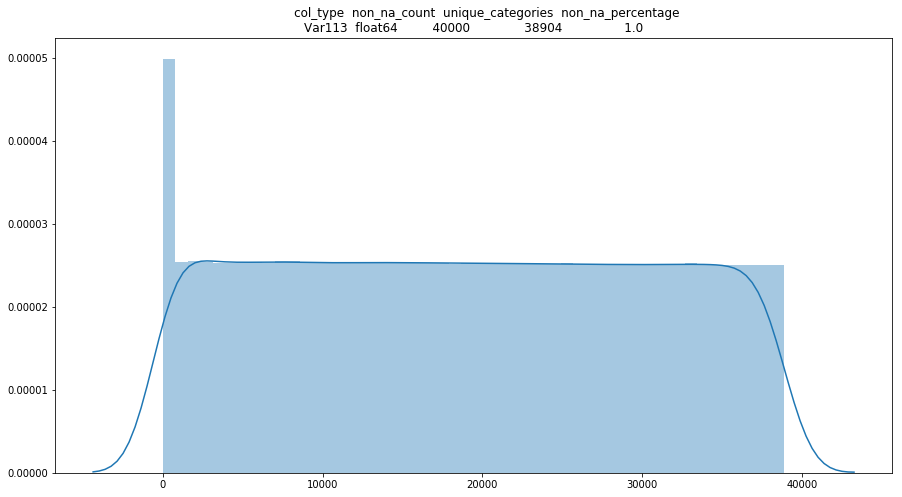

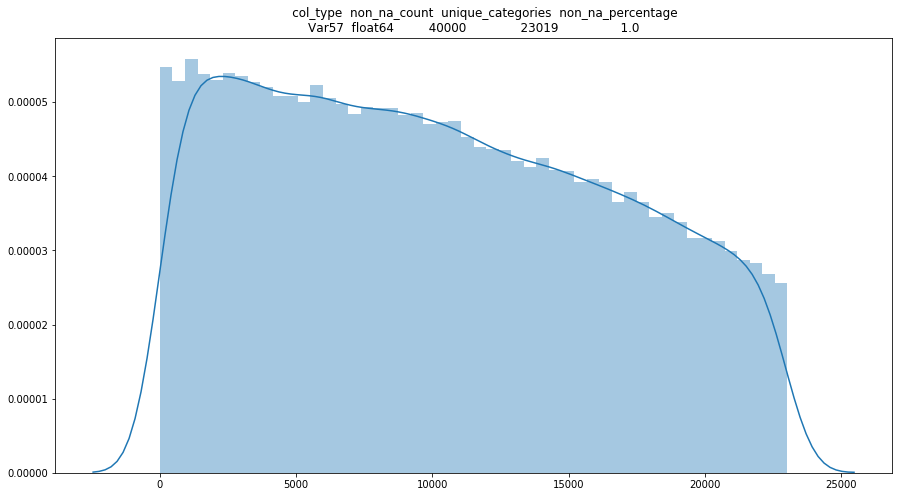

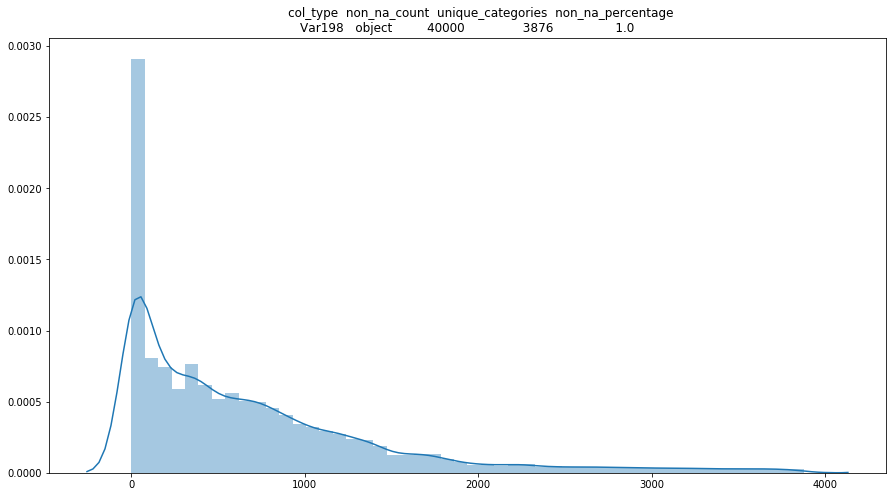

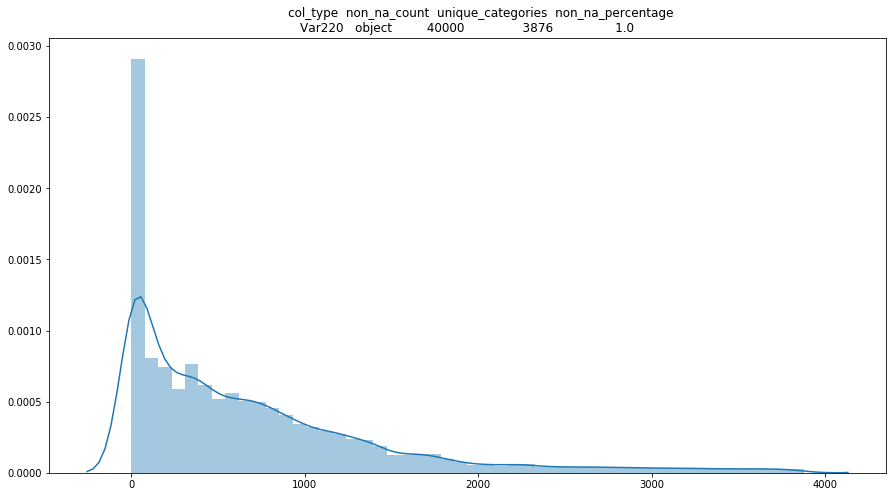

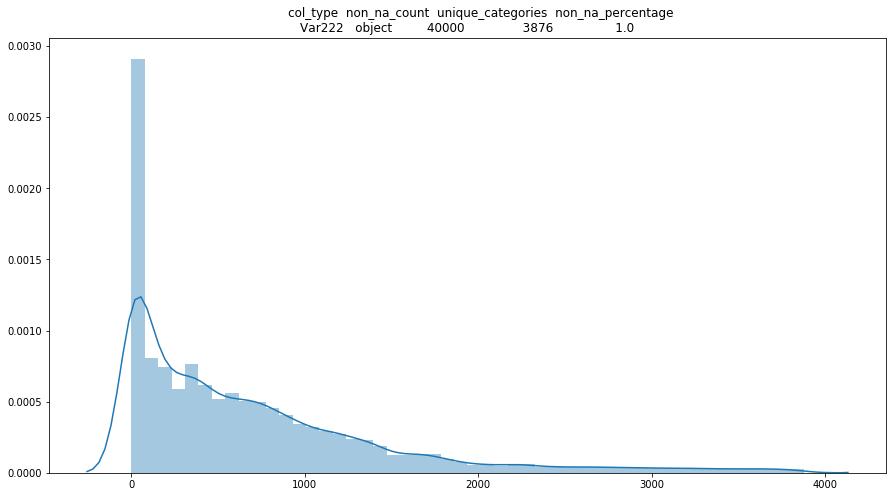

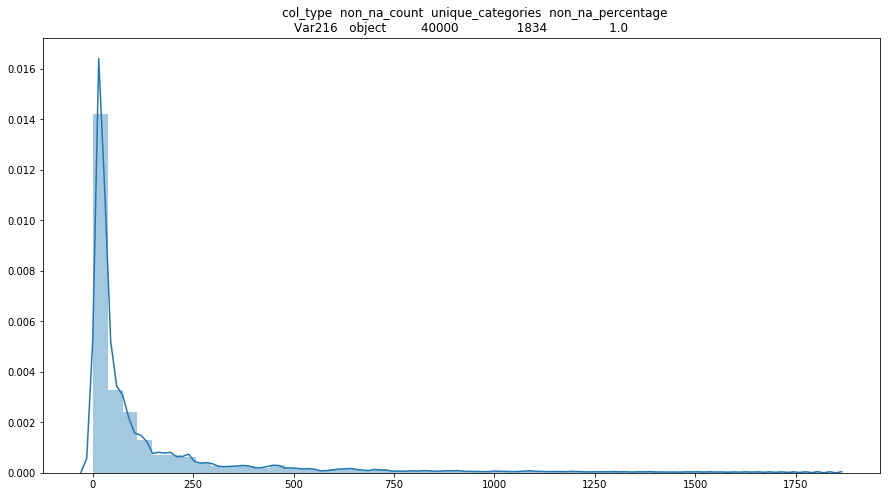

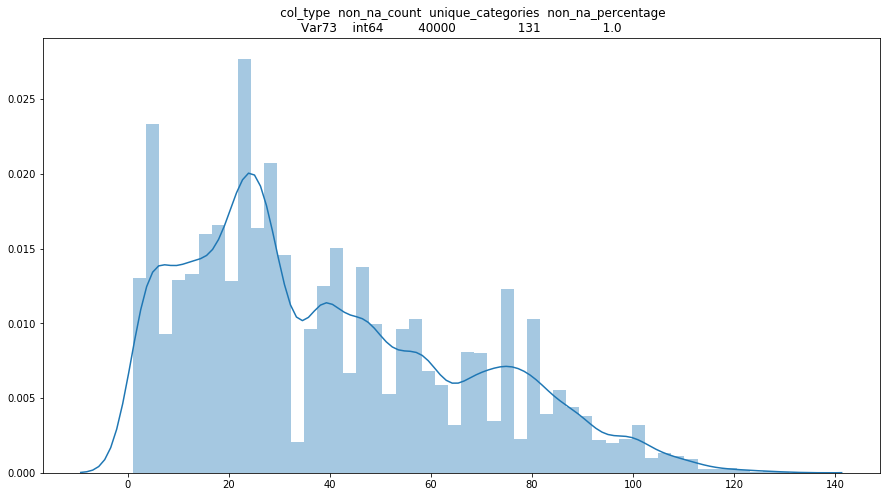

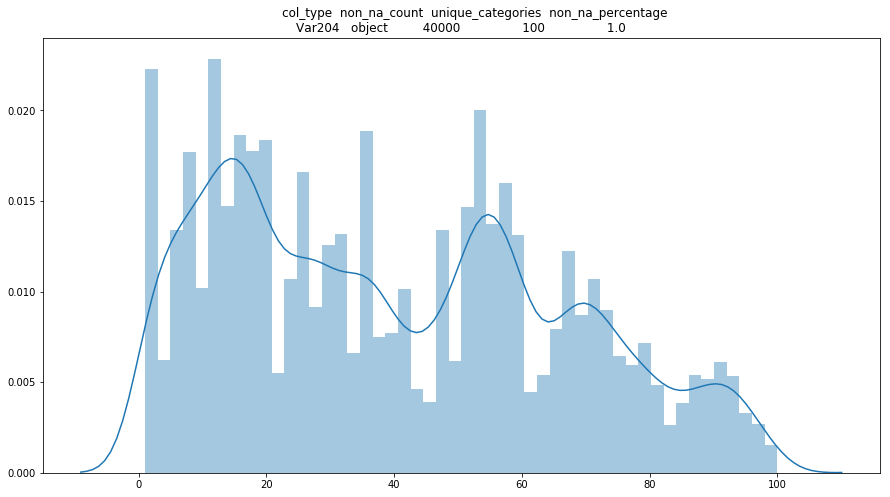

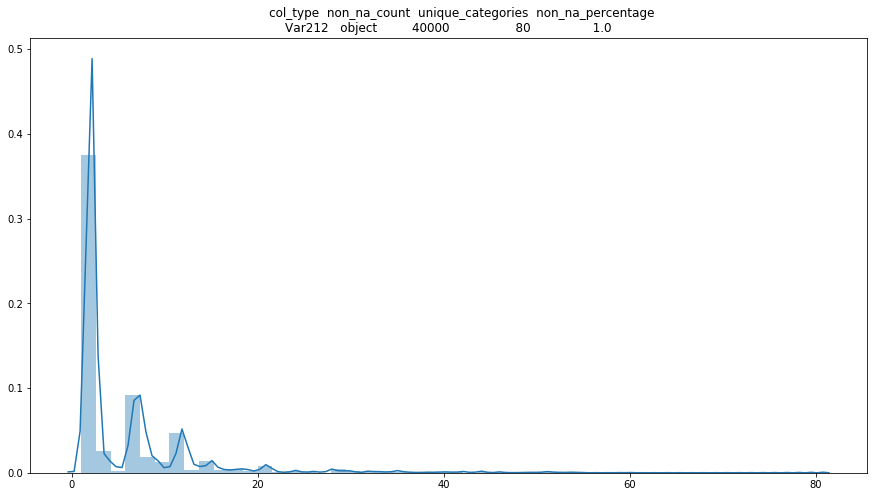

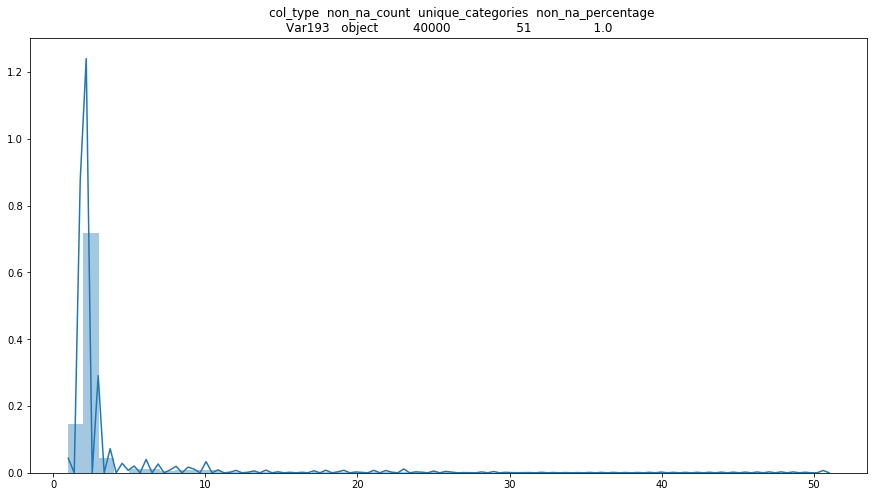

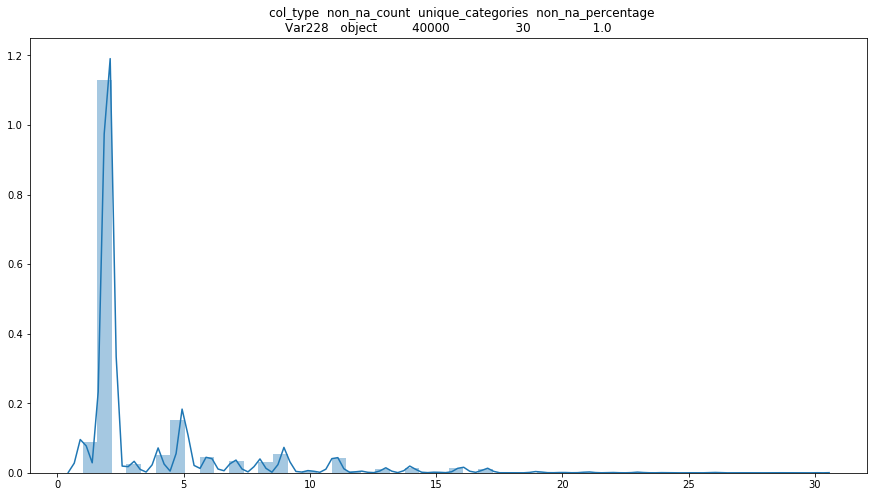

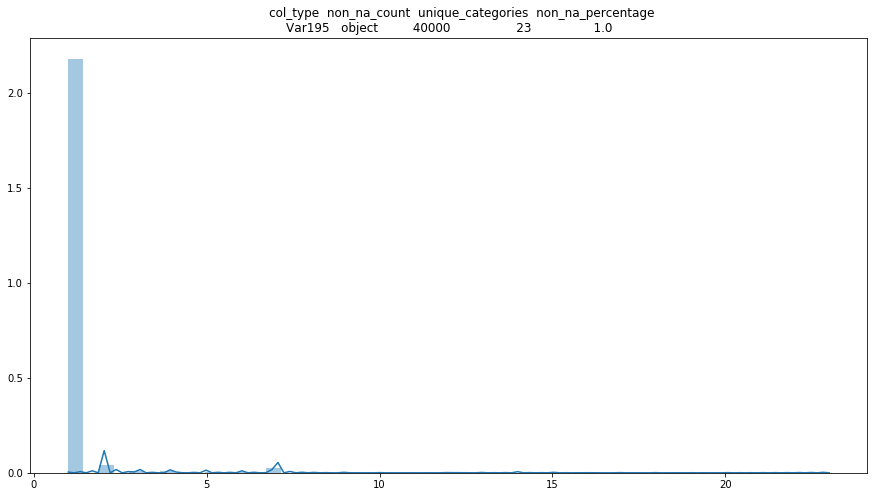

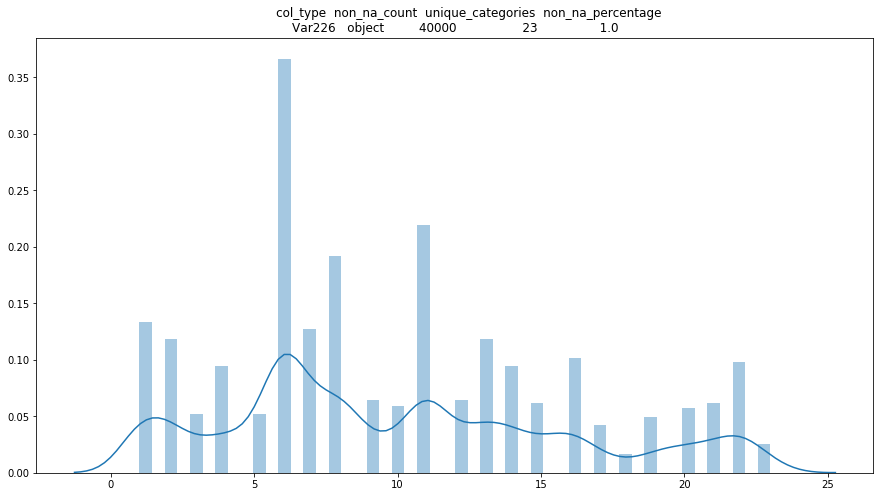

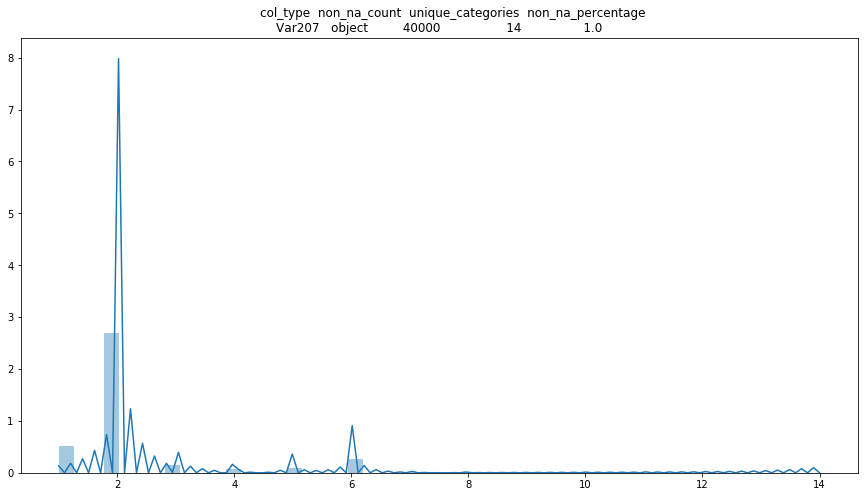

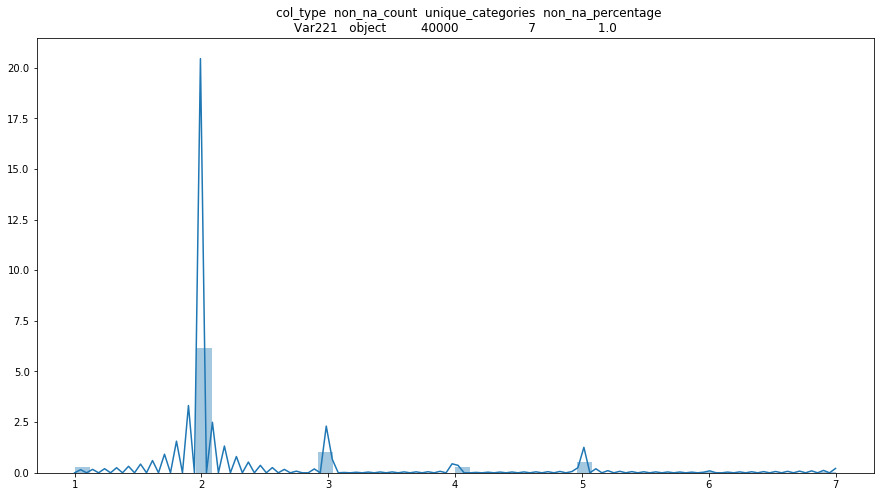

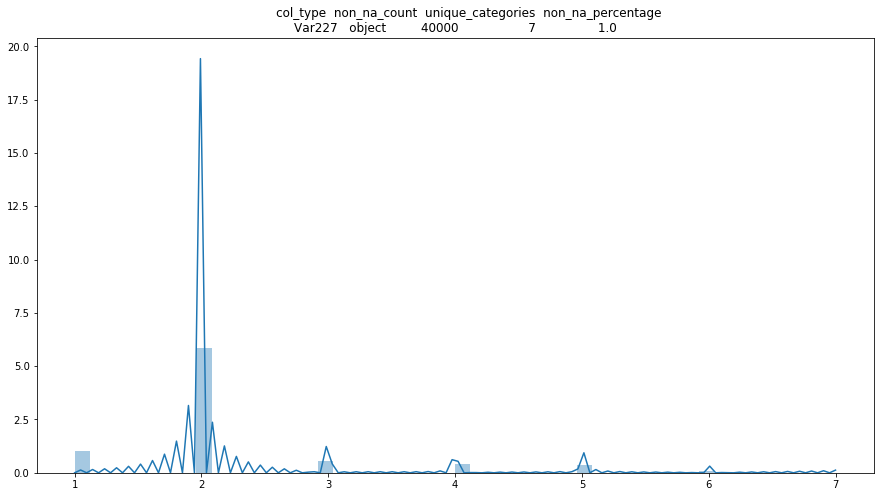

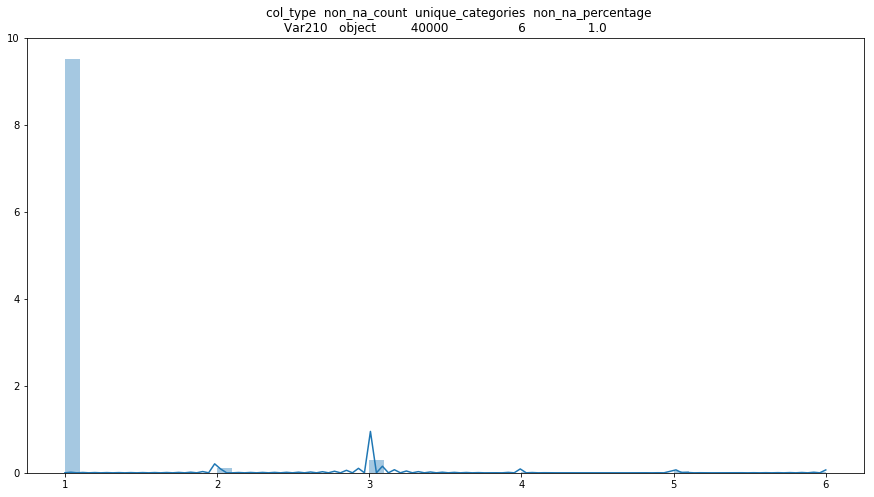

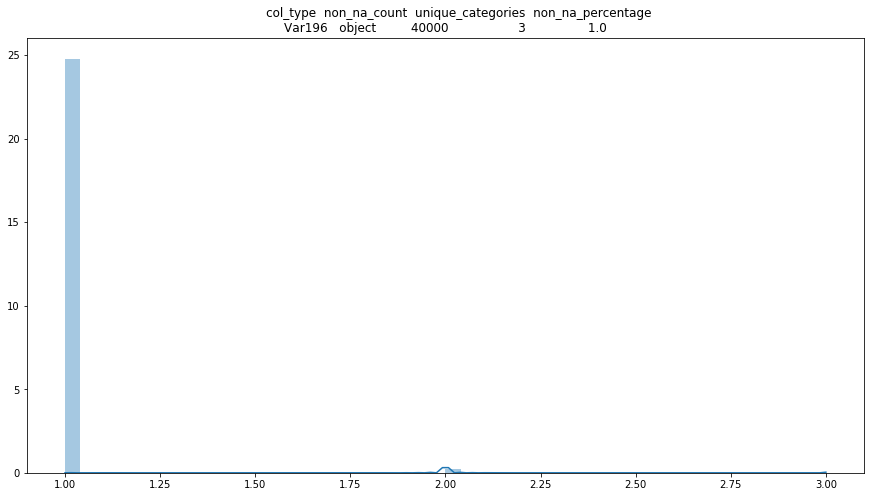

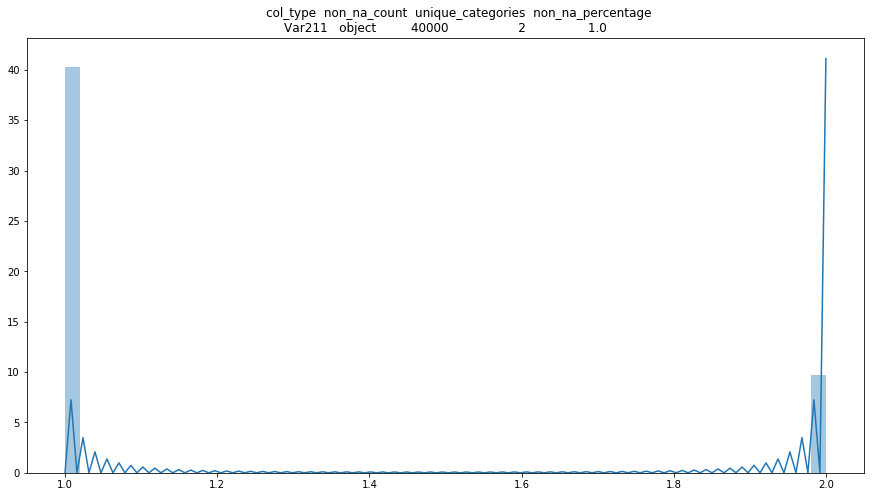

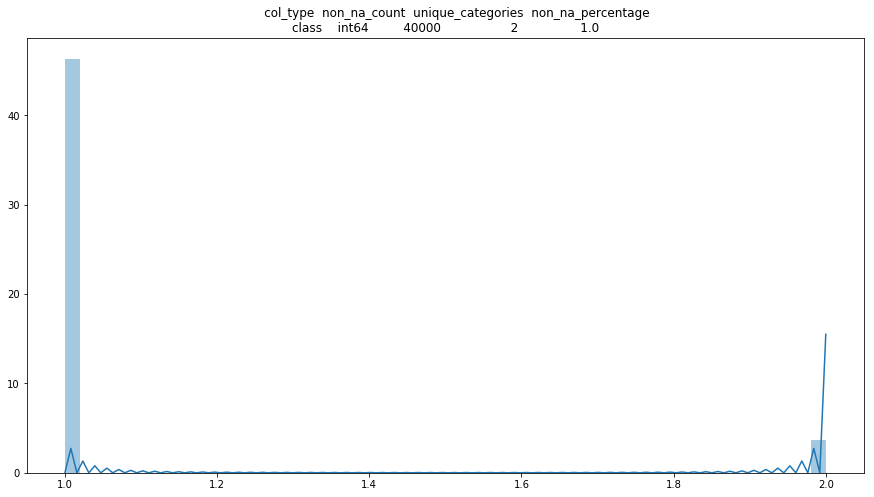

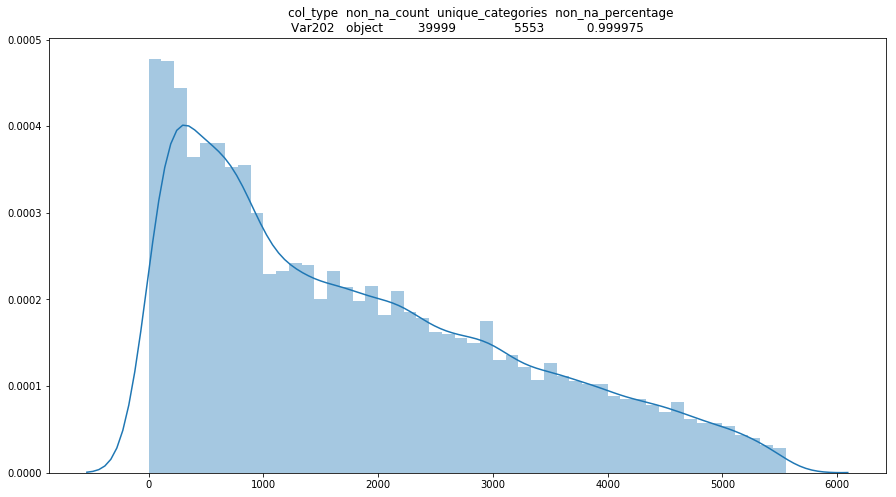

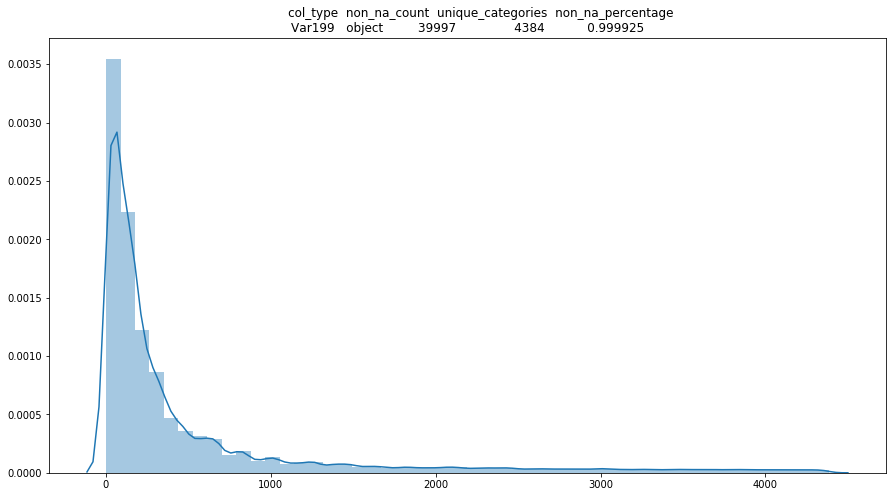

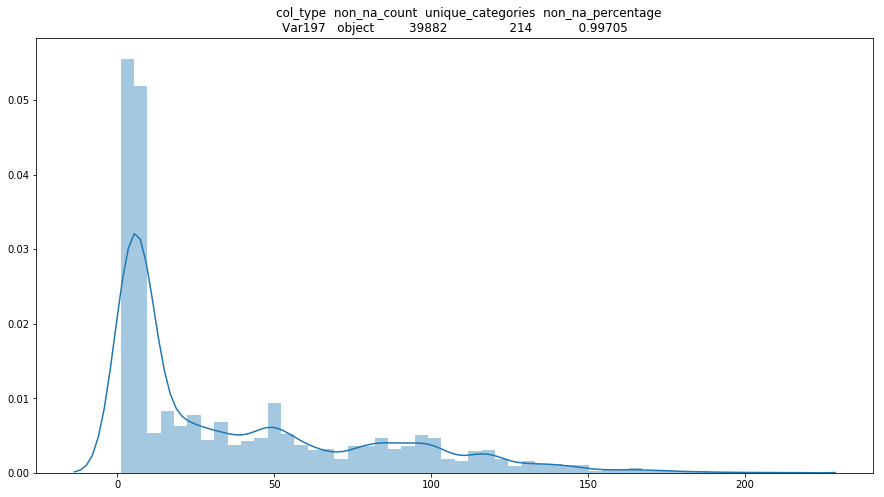

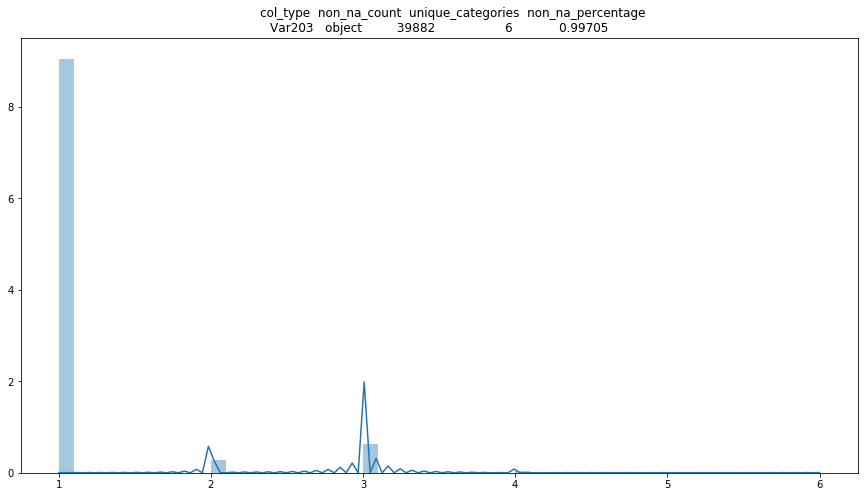

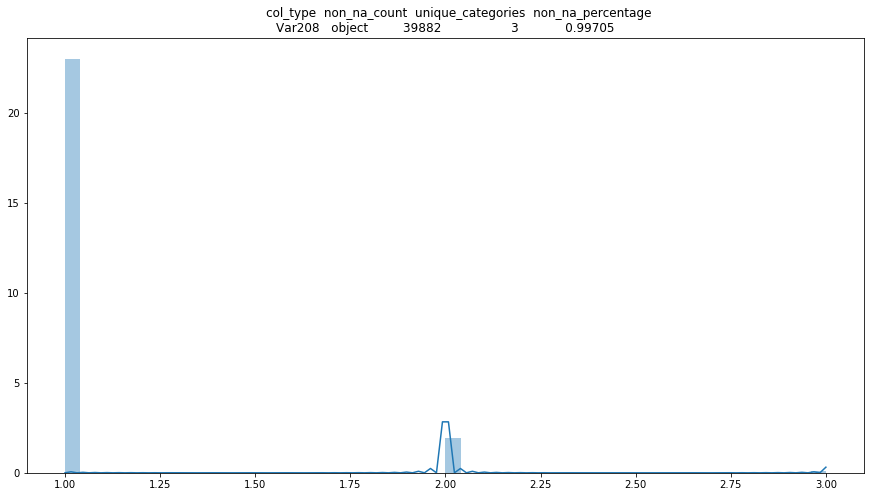

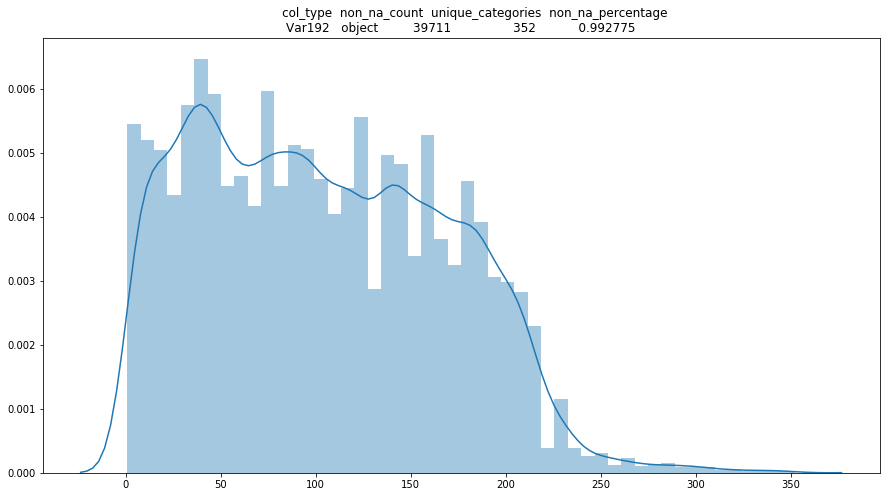

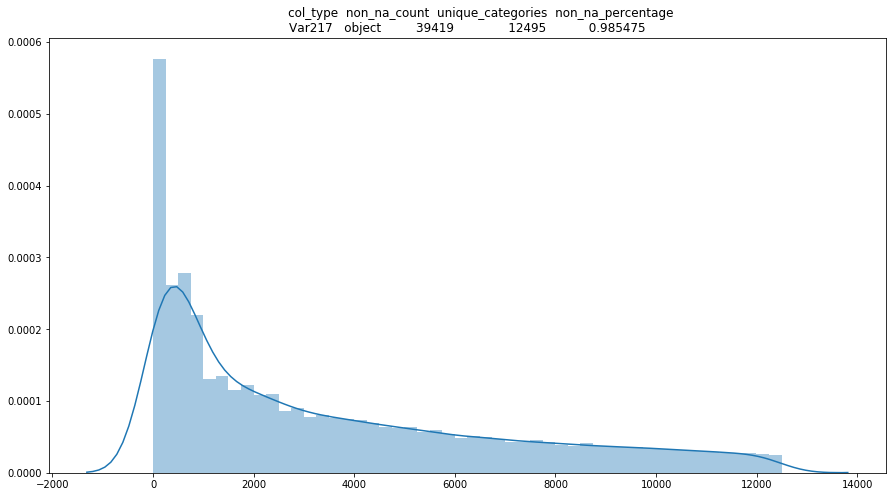

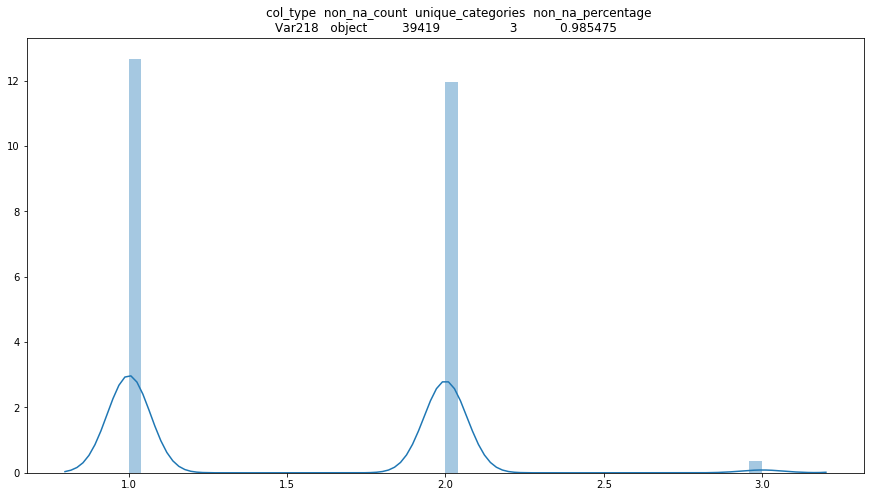

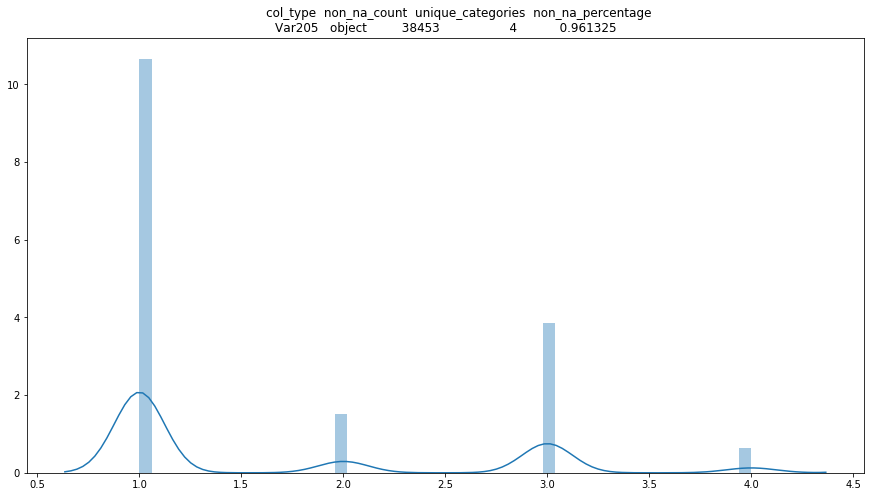

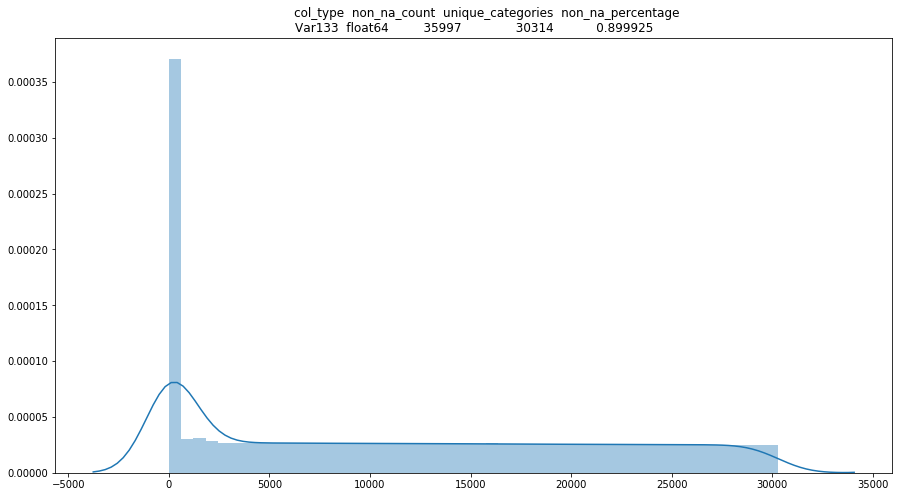

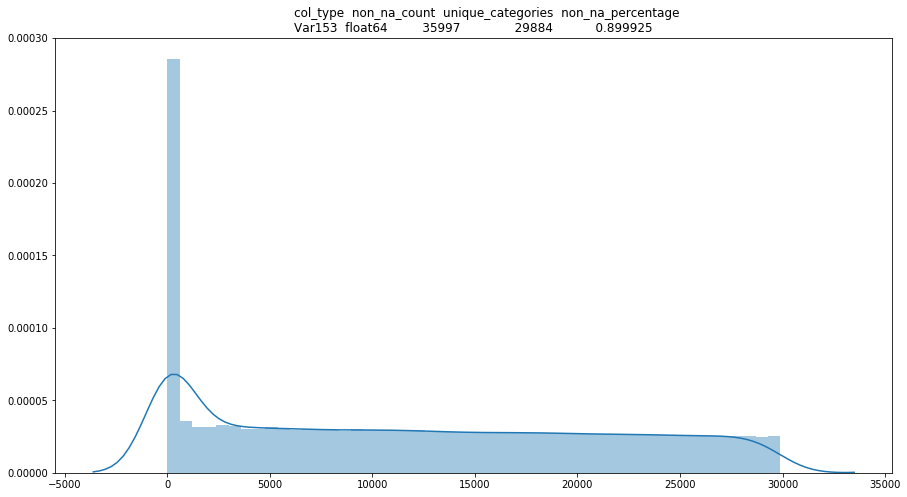

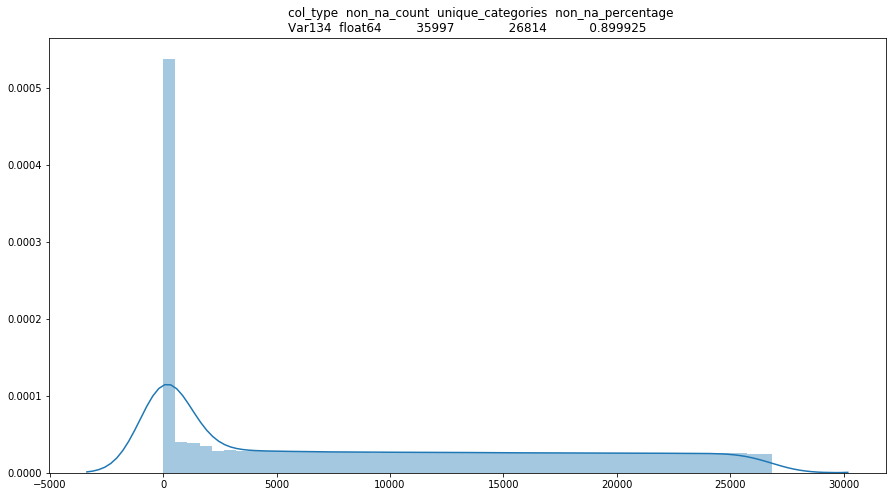

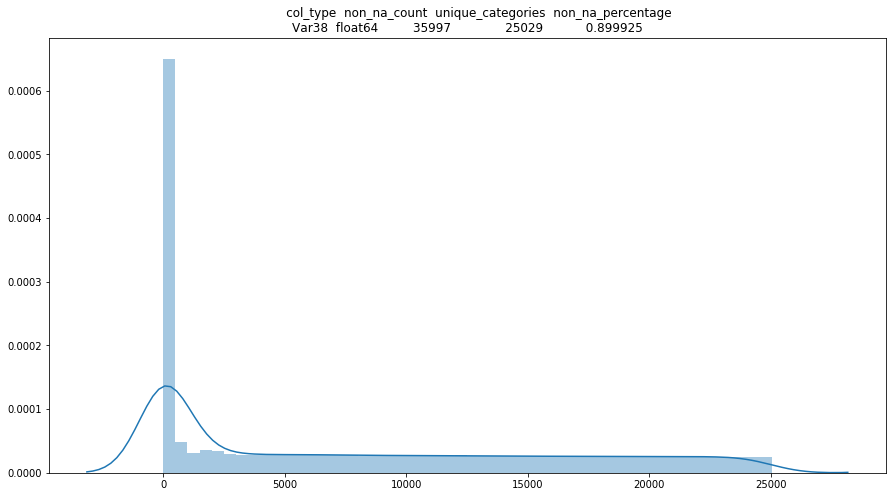

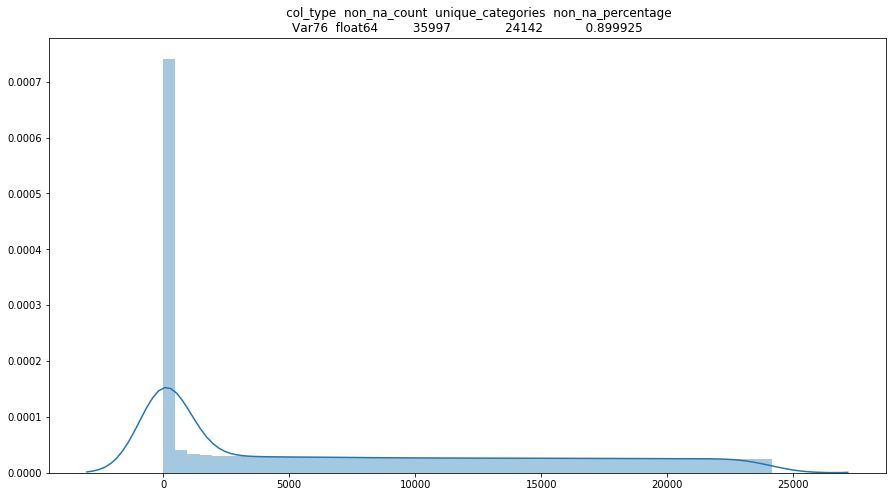

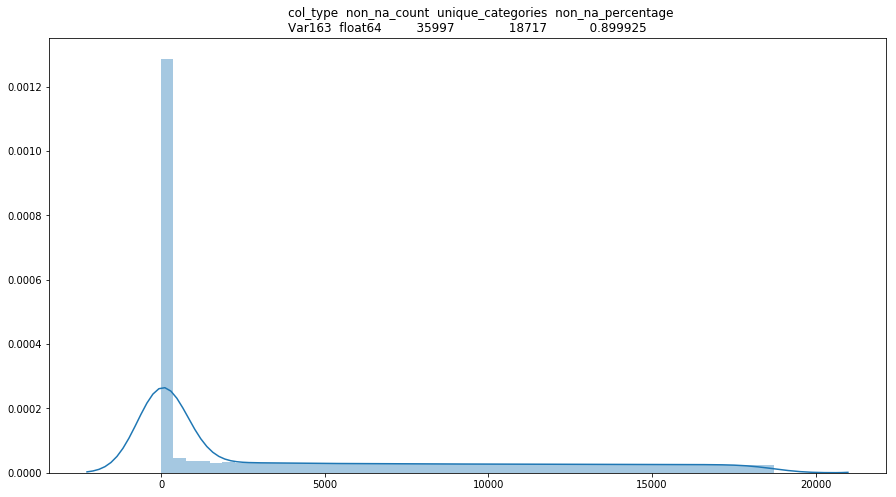

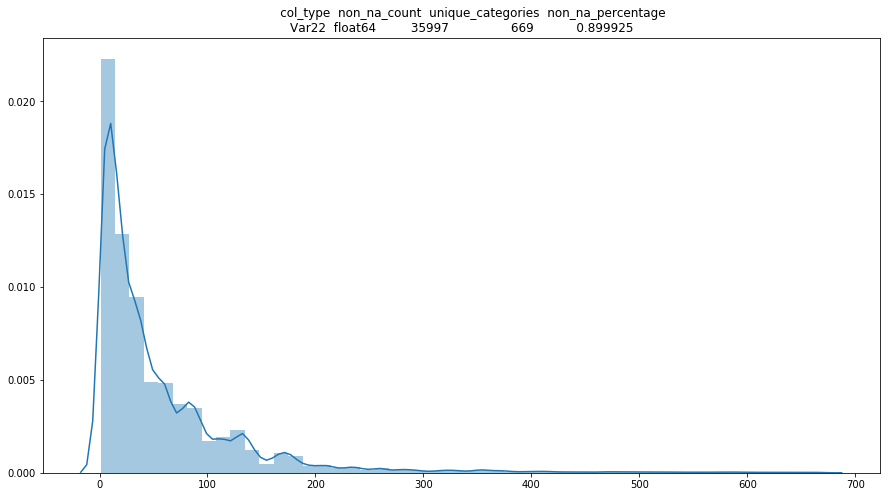

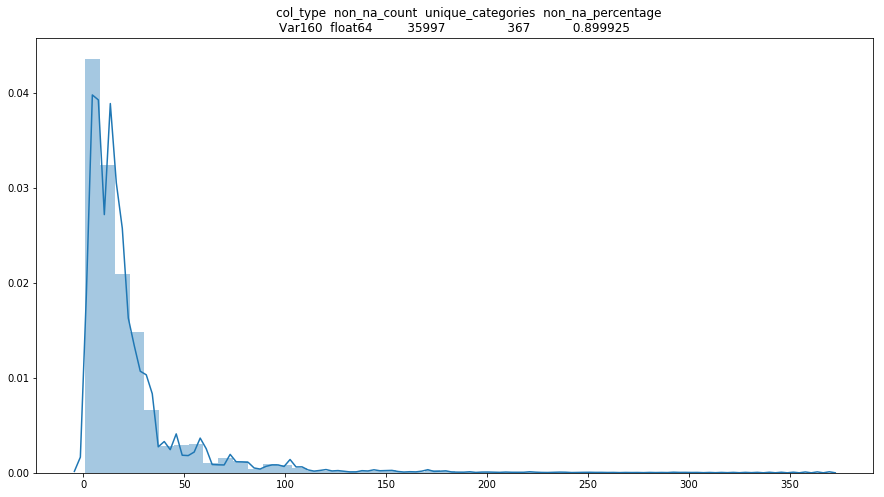

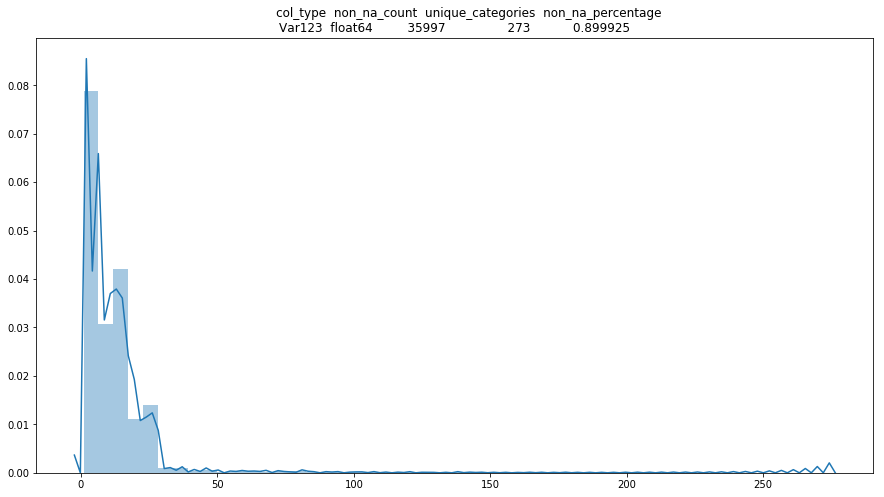

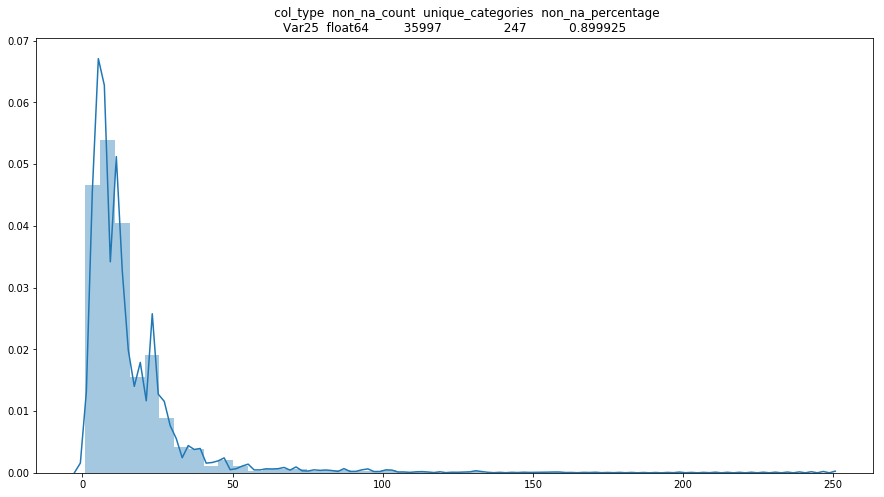

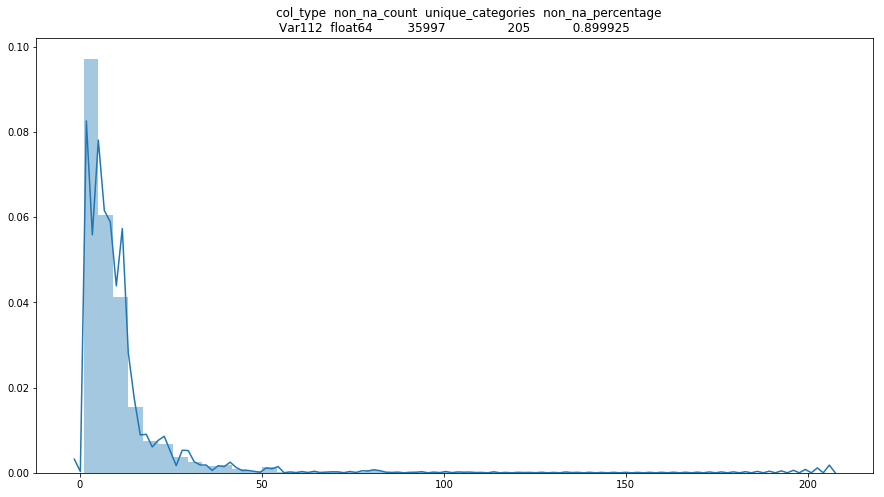

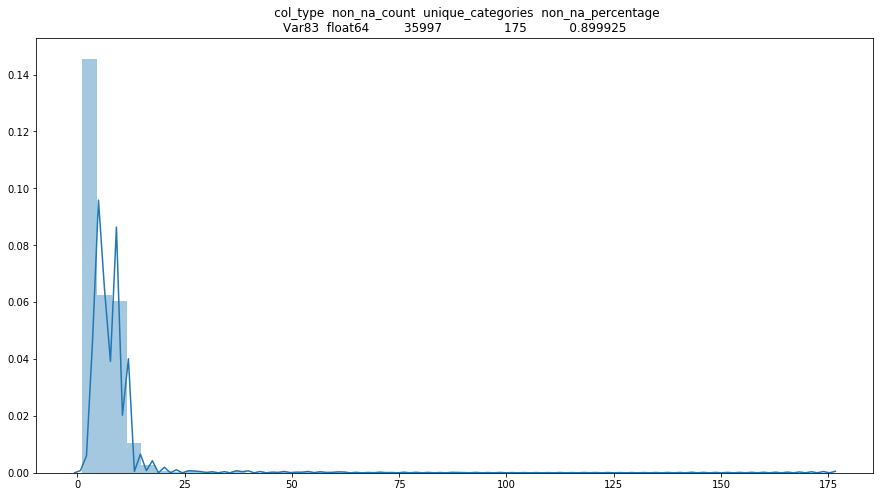

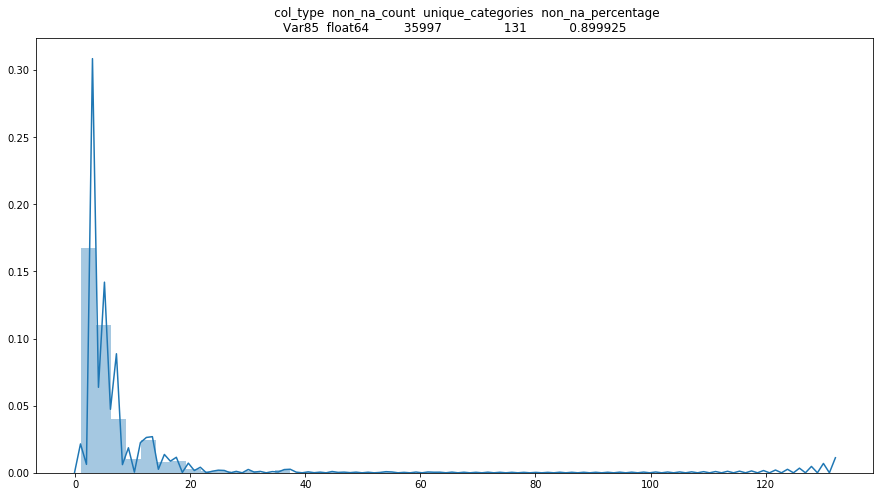

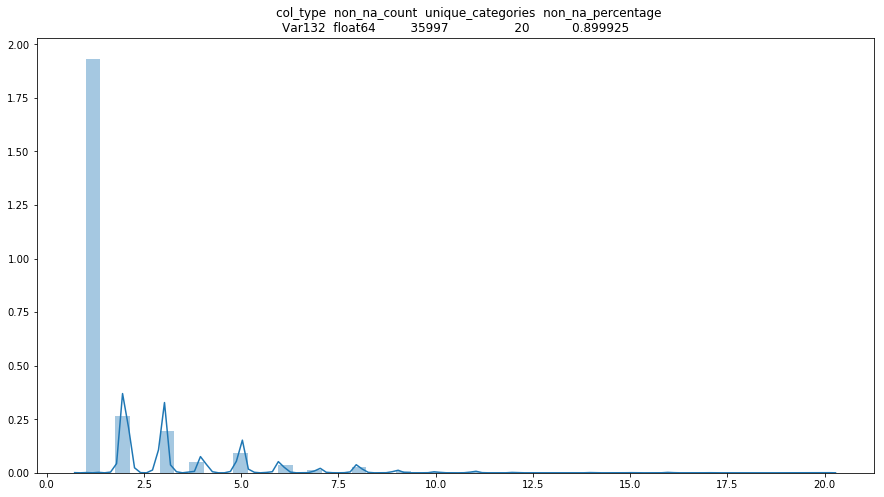

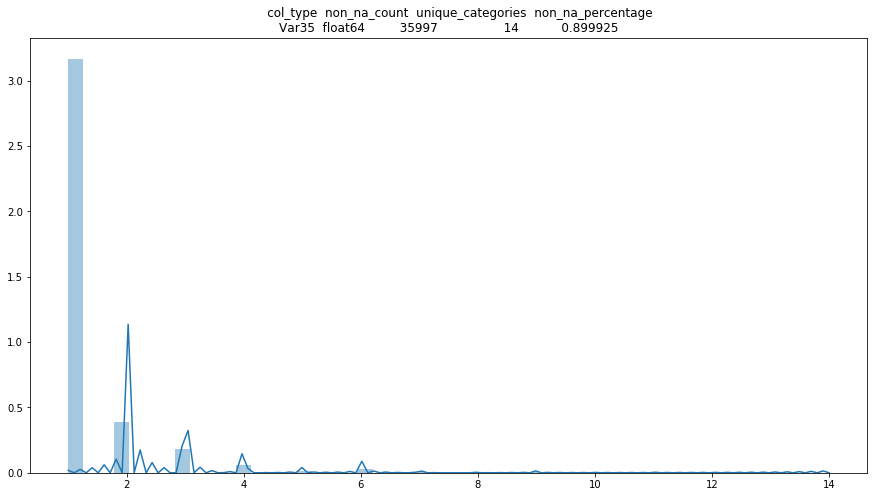

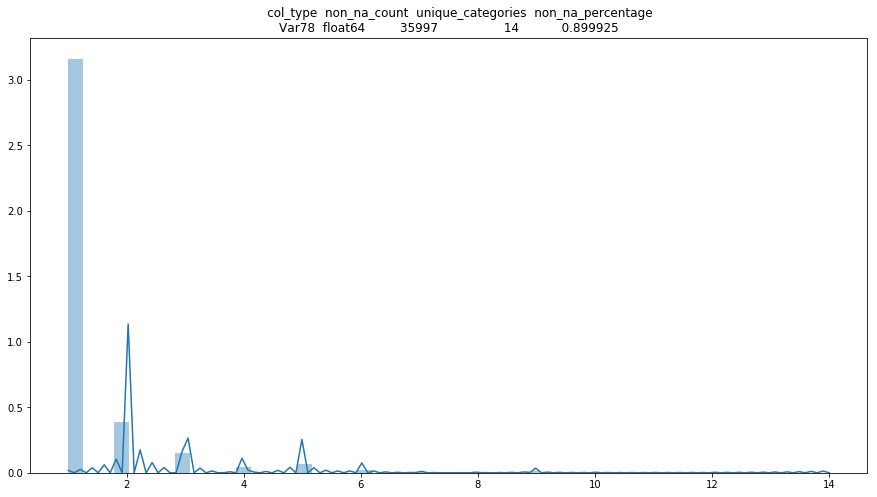

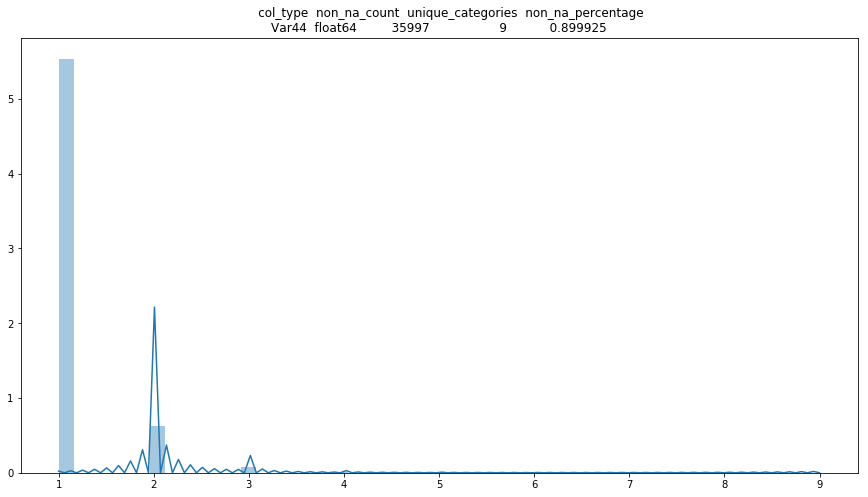

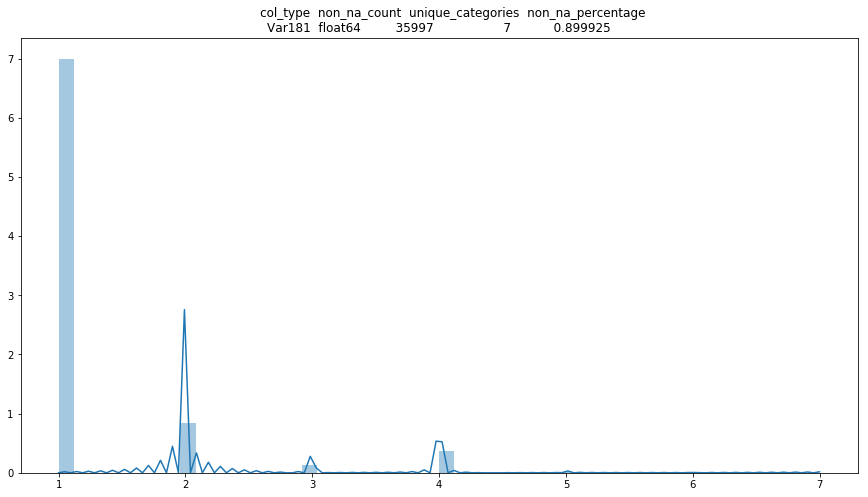

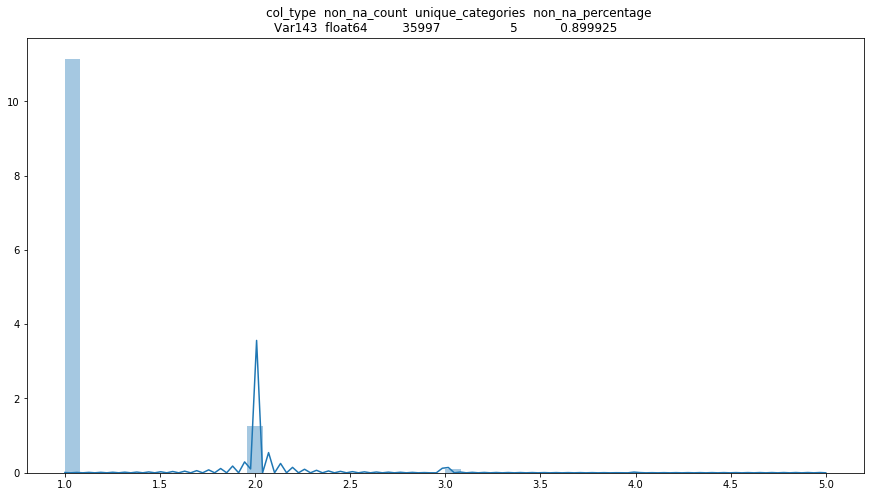

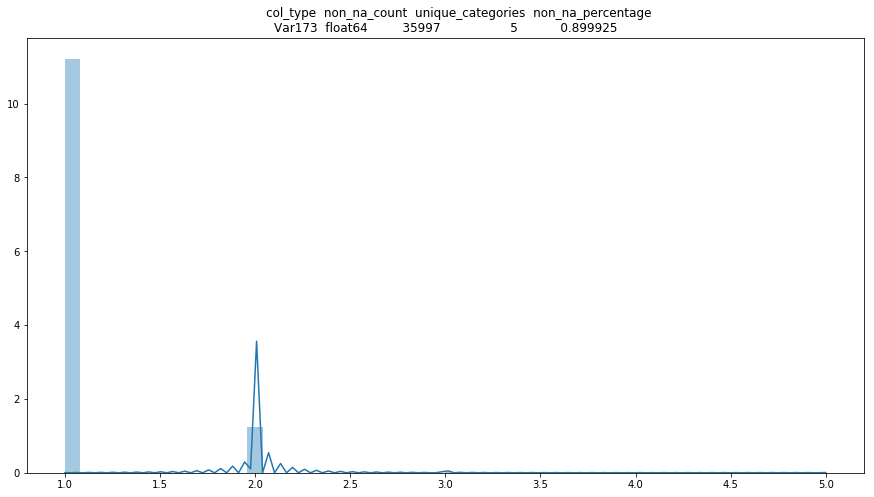

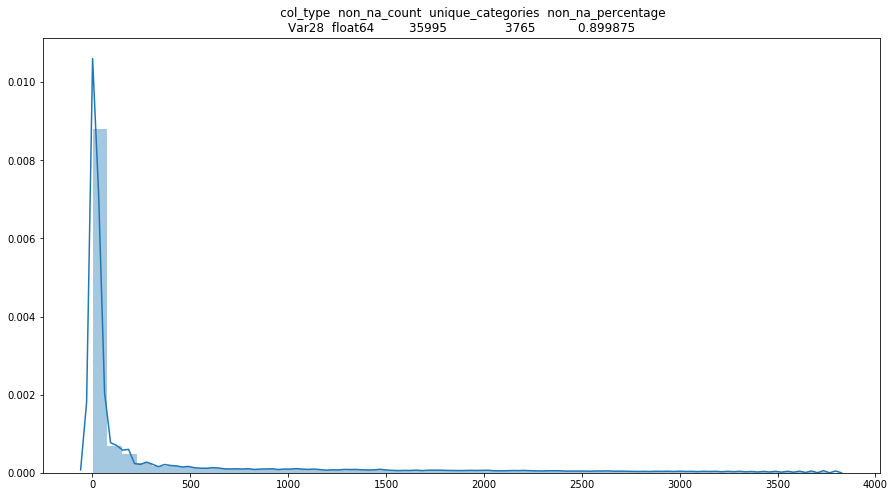

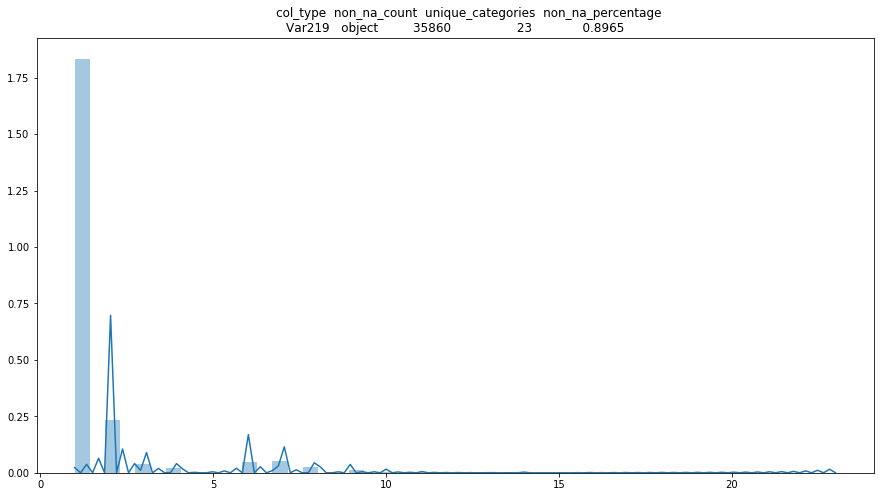

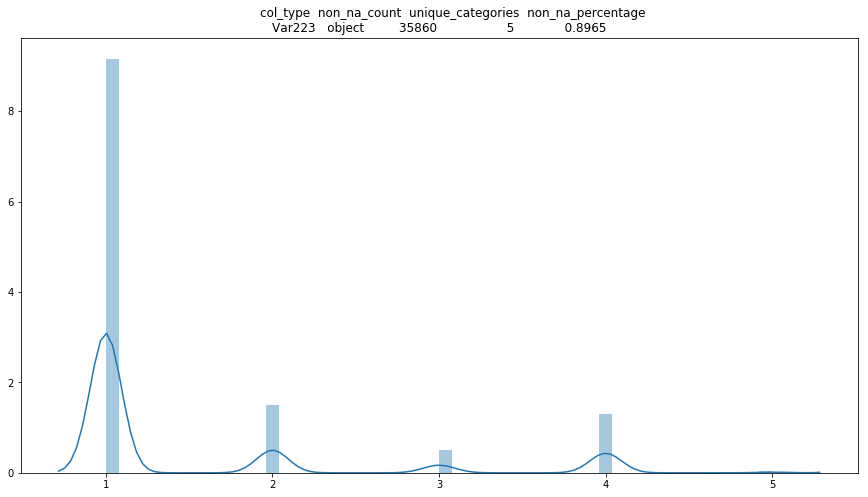

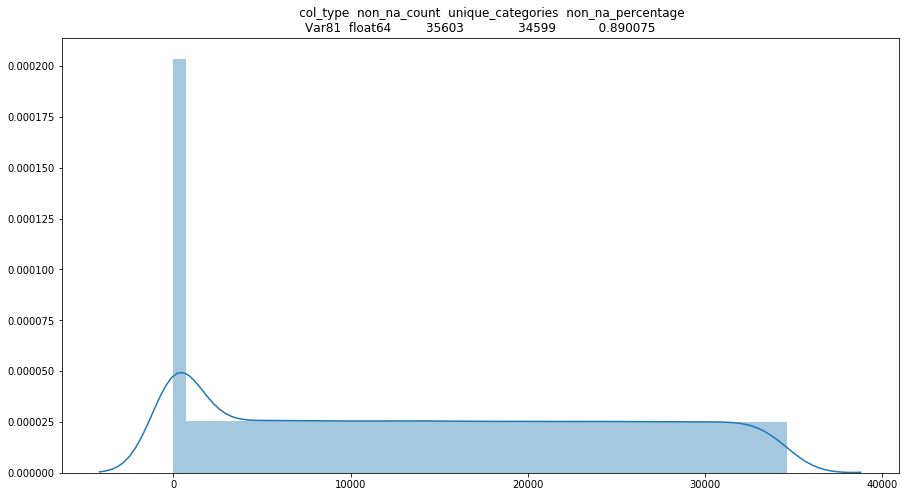

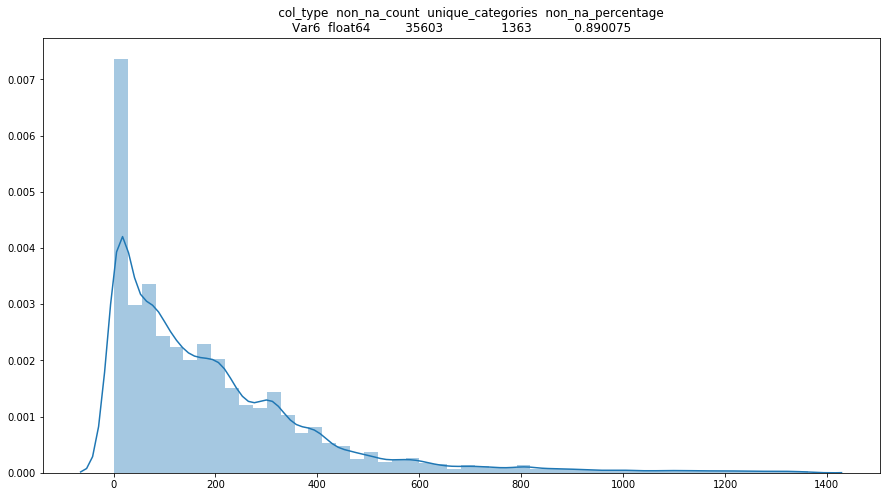

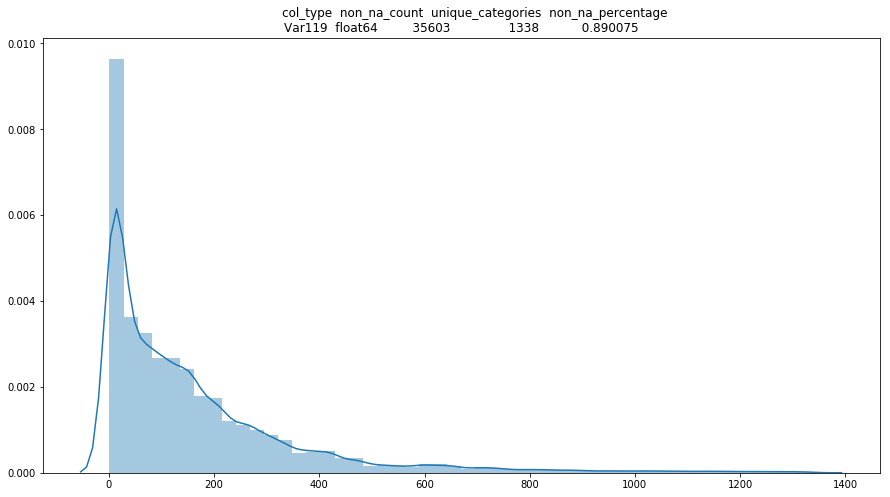

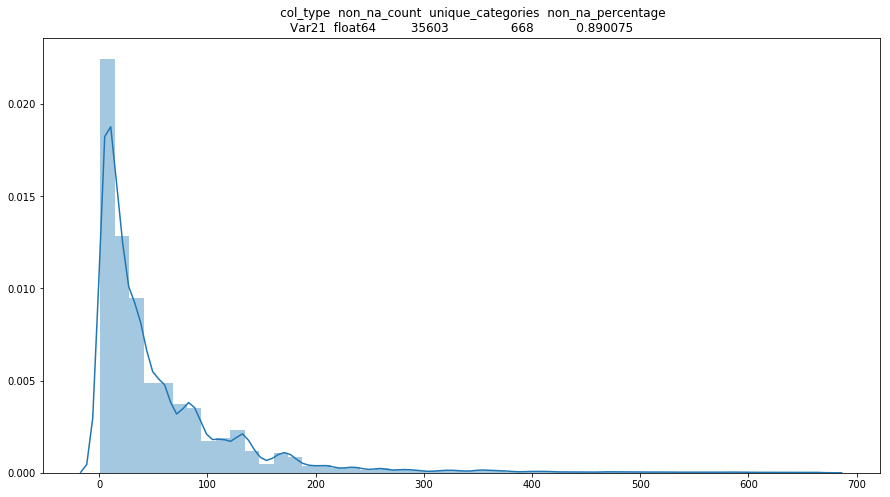

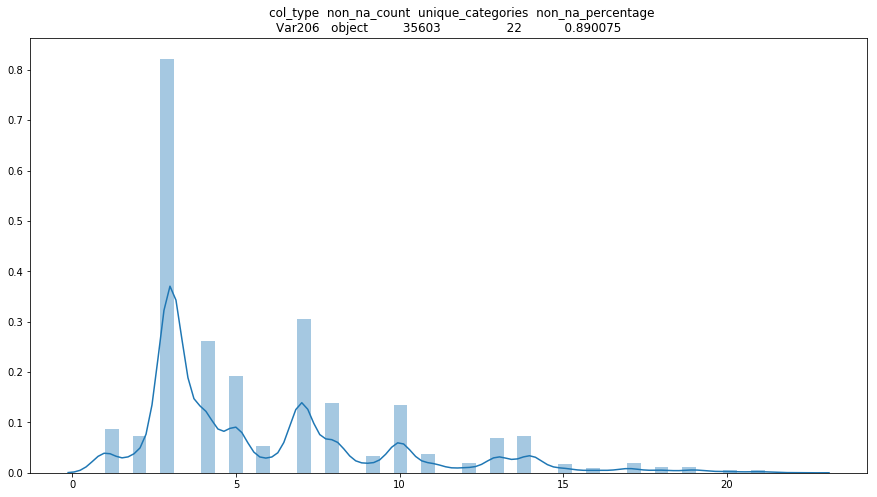

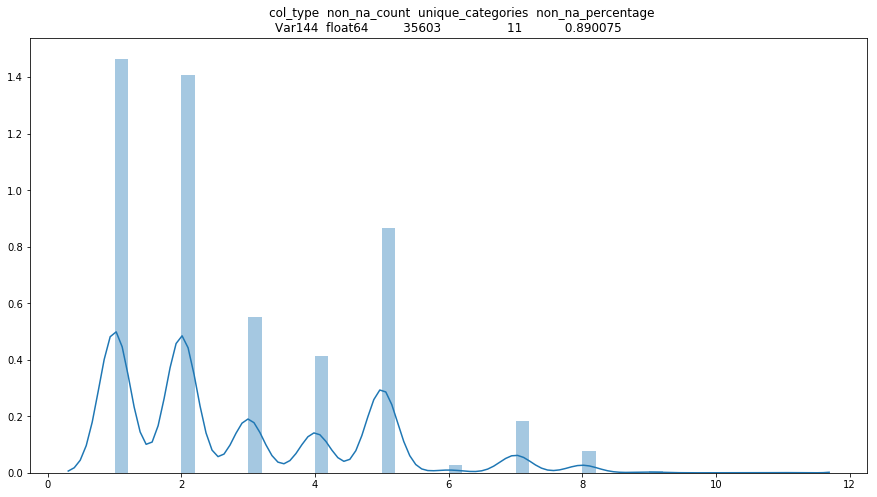

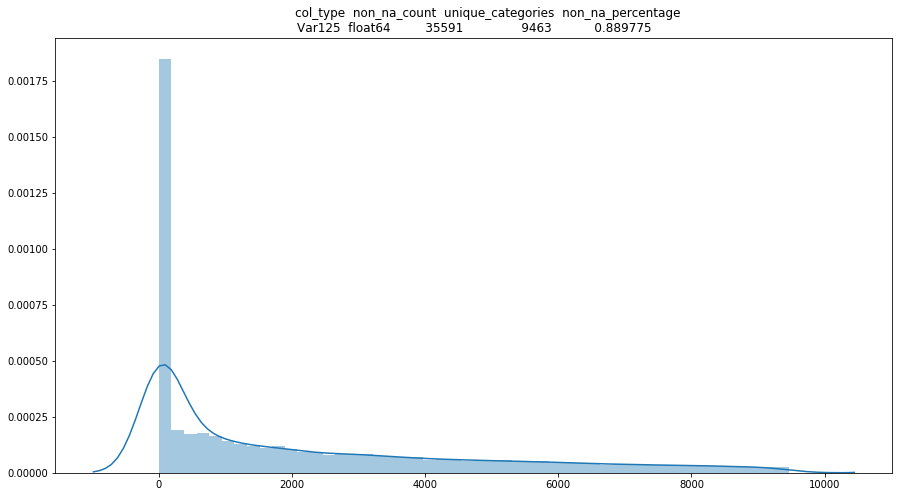

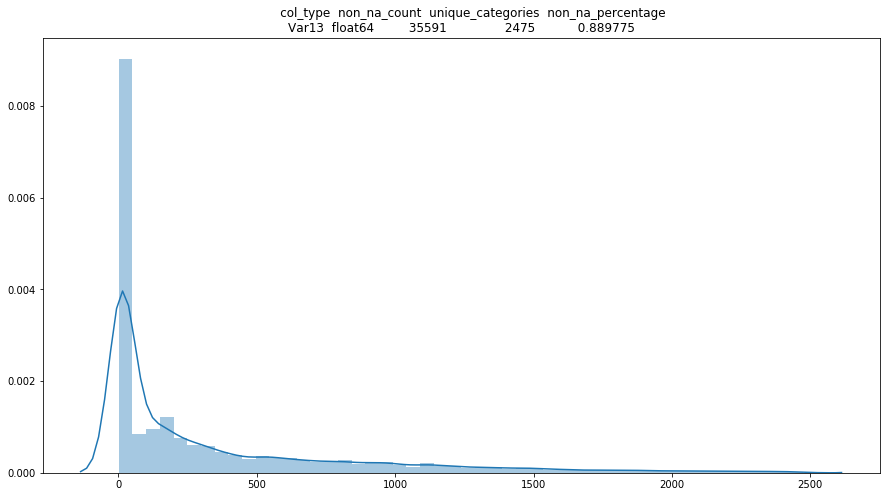

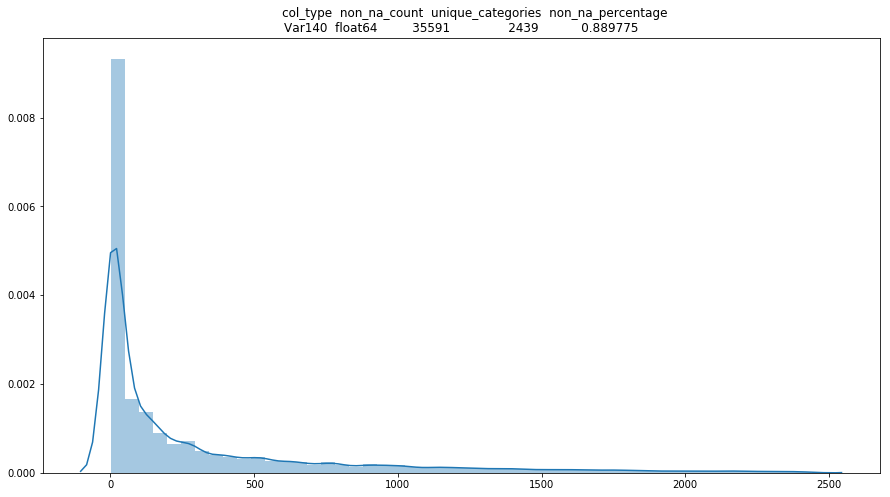

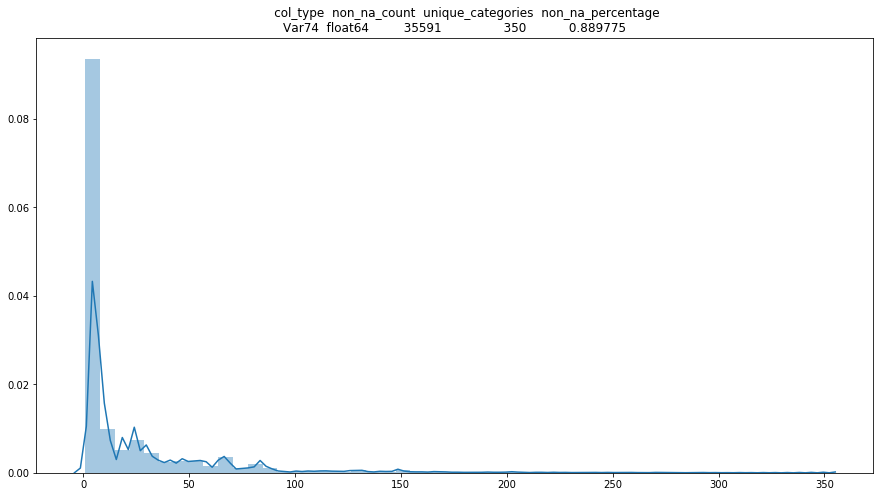

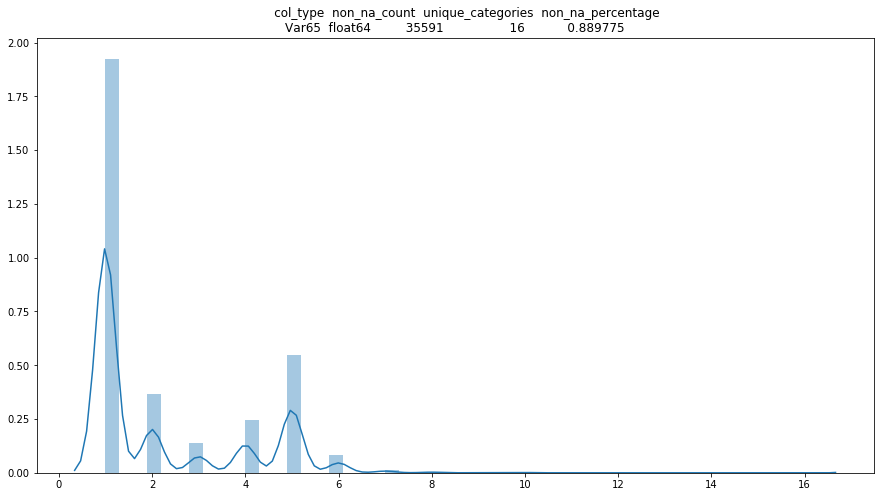

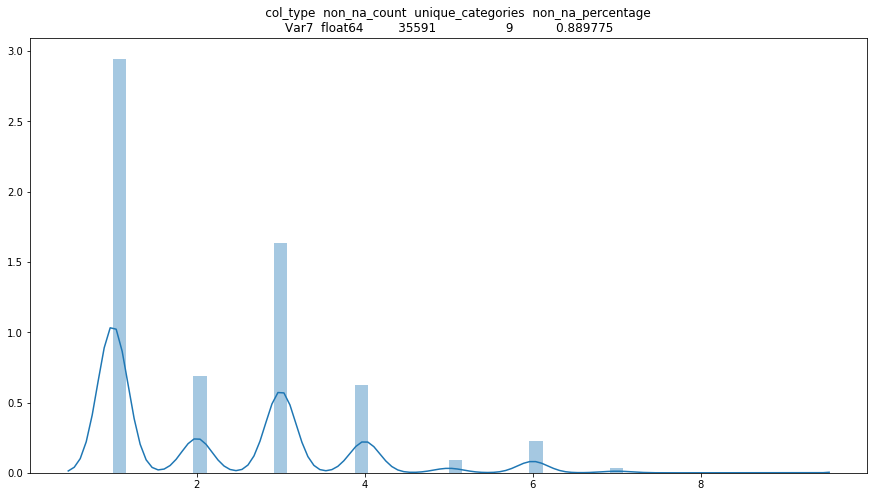

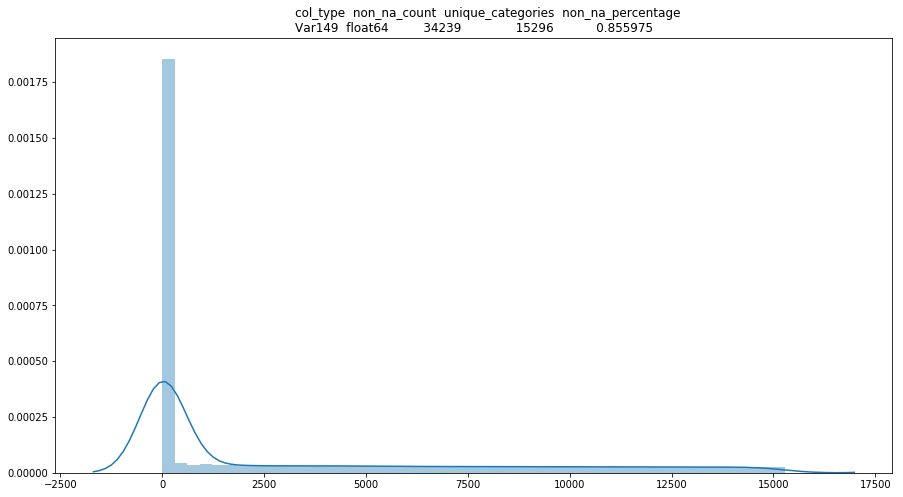

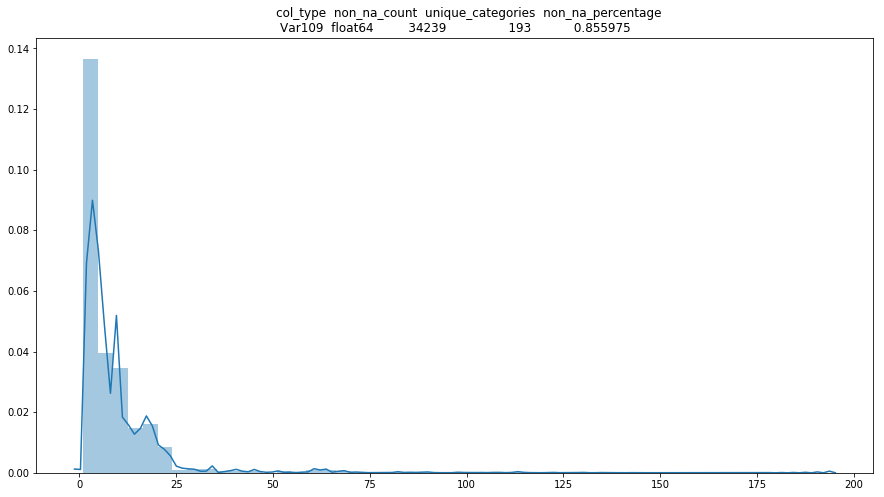

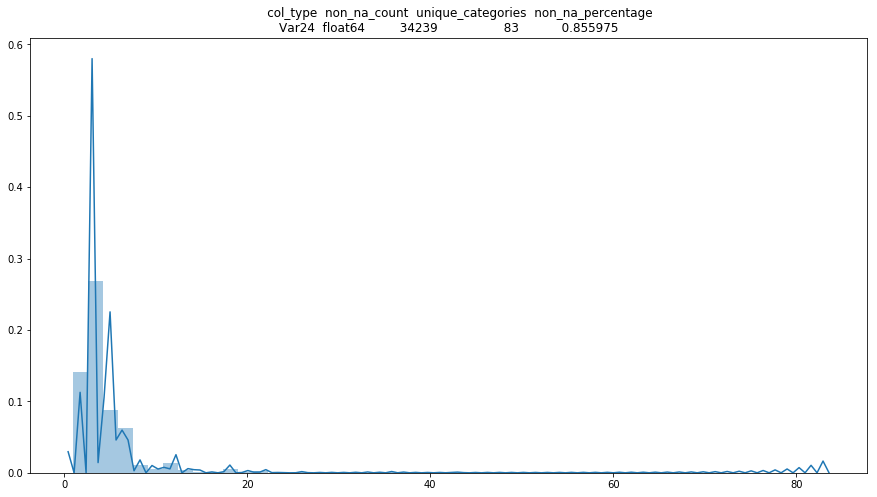

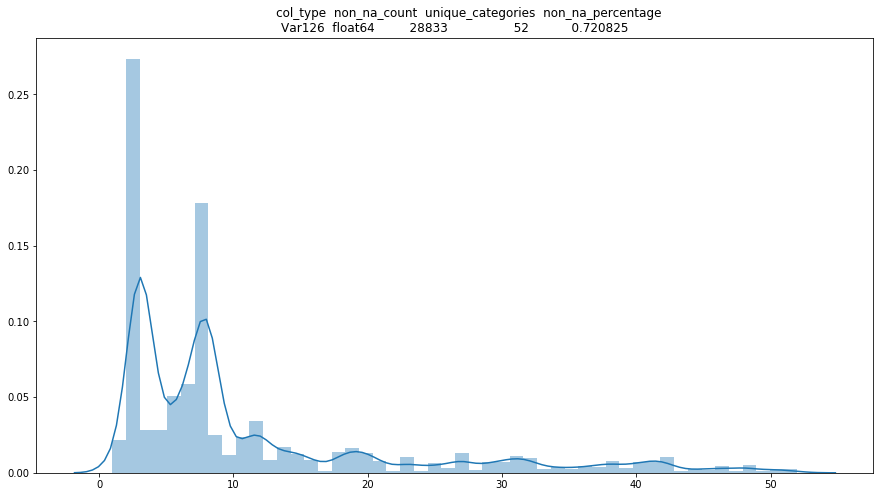

In [19]:
for col in chosen_columns:
    plot_histogram(col)

## Data correlation

### prints the columns correlated (Pearson by default) with each column

In [20]:
def get_correlated_col_pairs(df, threshold=0.8):
    res = []
    corr = data.corr()
    for col in corr.columns:
        r = corr[col]
        correlated = r[r > threshold].index.drop(col)
        if len(correlated) > 0:
            res.append((col, correlated.values))
    return res

data = df.loc[:, chosen_columns]
for col, corr in get_correlated_col_pairs(df.loc[:, chosen_columns]):
    print("{0}: {1}".format(col, corr))

Var22: ['Var160' 'Var123' 'Var25' 'Var112' 'Var21']
Var160: ['Var22' 'Var21']
Var123: ['Var22' 'Var21']
Var25: ['Var22' 'Var21']
Var112: ['Var22' 'Var21' 'Var109']
Var132: ['Var78']
Var78: ['Var132']
Var21: ['Var22' 'Var160' 'Var123' 'Var25' 'Var112']
Var109: ['Var112']


In [21]:
df["Var198"].value_counts()

fhk21Ss    3503
PHNvXy8     921
iJzviRg     598
9GJGgoz     587
6CXYbuk     452
fqeOwLG     383
jCepSrJ     198
pro8v8X     189
_ybO0dd     189
0Vr7wZ4     185
gwY4NQF     170
kJ1ERUT     156
86dToXU     156
qEdASpP     154
6KF0k8W     154
3FCrXBz     139
RPKu5tB     130
FJDupBg     129
T2e7I6V     127
xUTqnbN     119
5EpXqGp     109
fIZ2EMp     104
LG0JHBC     100
8ij6Lg8     100
esxkA1P      99
kjvBmIU      98
ka_ns41      97
ZtMq7Fq      94
WkH7nZN      92
0v27GMk      90
           ... 
mR_11pK       1
LcOZyzC       1
fmOZNDF       1
LnrJJaC       1
cmP6gtF       1
1XgAFES       1
uwNOOkV       1
DOI7_tY       1
YrqCIek       1
6dkzLxR       1
UApnV1D       1
NA57zLh       1
SWGZIlx       1
c3dygzQ       1
UMZ7z27       1
GfcrR6d       1
jnNDzCB       1
A9LC0E1       1
AvwXyrj       1
5ozOt0o       1
GOBQzR1       1
aoAgeHX       1
m7Ghurh       1
9oS3PRP       1
fi0zv1k       1
Ot177fS       1
L1gMv2s       1
ZtBQn2A       1
5j8ysxi       1
TsqLIo1       1
Name: Var198, Length: 38

In [22]:
df["Var220"].value_counts()

4UxGlow    3503
UF16siJ     921
ch2oGfM     598
Tvpip6Z     587
ROeipLp     452
fxJmel6     383
Oy_RPEi     198
L91KIiz     189
meWVy8V     189
XbZitea     185
t5EoLzk     170
MMTJrCp     156
QMaRwBA     156
ot6oLzk     154
0AJo2f2     154
oatipLp     139
WdP1WU5     130
OYHoGfM     129
ACmTklq     127
LwGVino     119
OTgQ8OA     109
YZ2TNgw     104
7OmVzos     100
ZDjvbB7     100
EPImS85      99
1vNmS85      98
1YVfGrO      97
lbrVHK6      94
scZ0Q3K      92
YBh0nTz      90
           ... 
oatrocZ       1
7Jx32Vb       1
54p4F5W       1
1iA871e       1
nfAJkBG       1
nRiA5kF       1
nMxQNDb       1
a_gytBJ       1
OOCmZiv       1
FhTtGh8       1
faba63T       1
vtCsCvN       1
QMa8jNM       1
FmXHySX       1
ZDjxjdY       1
LWkKHkV       1
aaucuZ3       1
3vm3Dfm       1
PtL3AwP       1
bDMpyr_       1
UGotww6       1
dMzAAox       1
uSmihDE       1
4LANoy4       1
ezqLlj8       1
PXb_jOL       1
uwhovo7       1
jbWiyL3       1
uyrTQ7V       1
nhSf6lc       1
Name: Var220, Length: 38

In [23]:
df["Var222"].value_counts()

catzS2D    3503
APgdzOv     921
P6pu4Vl     598
hHJsvbM     587
K2SqEo9     452
WfsWw2A     383
FS4qjNq     198
CE7uk3u     189
DQ3u3MC     189
DHPNgqU     185
ag5iNPX     170
0D0gQ7h     156
Rkj9jvX     156
2Kb5FSF     154
IIvC99a     154
RsCQLlz     139
05j67Xw     130
RlTh9x_     129
rDbG_aX     127
xYH_Q4n     119
Vo68gbh     109
x3aOgRj     104
nx1K0JH     100
76DJixu     100
MI8s5nE      99
MkQldxq      98
fXVEsaq      97
_sz_44J      94
zmvzrB7      92
J_tzF_Q      90
           ... 
o1MDSFl       1
vASnBCF       1
865VbGi       1
mYtCF4K       1
H8tnSON       1
uVORq39       1
qWj4yOc       1
3C8JCAO       1
PmlzDoR       1
460RXzj       1
v5hWpYC       1
MDcnBCF       1
qpS9U2X       1
5ZTB6AS       1
Mkbbp_P       1
xb5M1Ad       1
avoURYX       1
_0hhLCZ       1
9vQAp1i       1
l94UowW       1
NhZRt72       1
PXlliHW       1
qDd_Ukv       1
ILoNvUK       1
UKrYdpM       1
BlqEnkq       1
7zTEMuN       1
u_Vv45a       1
E5QMNjG       1
dh6aAwY       1
Name: Var222, Length: 38

## Some minor experiments

In [24]:
fe = ce.MEstimateEncoder(cols=["Var210"])
fe.fit_transform(df.loc[:, ["Var210"]], pd.DataFrame(y)).Var210.value_counts()

0.990816    38067
0.004459     1217
0.000025      400
0.000366      197
0.003777      119
Name: Var210, dtype: int64

In [25]:
columns_df.loc[["Var210"], :]

,col_type,non_na_count,unique_categories,non_na_percentage
Var210,object,40000,6,1.0


In [26]:
df["Var113"].value_counts().index.min()

-9803600.0

In [27]:
df["Var113"].value_counts().index.max()

9932480.0

In [28]:
pd.Series(df["Var113"].value_counts().index).mean()

-155197.9981600329

In [29]:
columns_df.loc[["Var160"]]

,col_type,non_na_count,unique_categories,non_na_percentage
Var160,float64,35997,367,0.899925


# Data processing

## choose columns that how have less (or equal) than n% NA values

In [30]:
chosen_columns = columns_df.loc[columns_df.non_na_percentage >= 0.7].index.values

In [31]:
chosen_columns

array(['Var113', 'Var57', 'Var198', 'Var220', 'Var222', 'Var216', 'Var73',
       'Var204', 'Var212', 'Var193', 'Var228', 'Var195', 'Var226',
       'Var207', 'Var221', 'Var227', 'Var210', 'Var196', 'Var211',
       'class', 'Var202', 'Var199', 'Var197', 'Var203', 'Var208',
       'Var192', 'Var217', 'Var218', 'Var205', 'Var133', 'Var153',
       'Var134', 'Var38', 'Var76', 'Var163', 'Var22', 'Var160', 'Var123',
       'Var25', 'Var112', 'Var83', 'Var85', 'Var132', 'Var35', 'Var78',
       'Var44', 'Var181', 'Var143', 'Var173', 'Var28', 'Var219', 'Var223',
       'Var81', 'Var6', 'Var119', 'Var21', 'Var206', 'Var144', 'Var125',
       'Var13', 'Var140', 'Var74', 'Var65', 'Var7', 'Var149', 'Var109',
       'Var24', 'Var126'], dtype=object)

In [32]:
len(chosen_columns)

68

In [33]:
def keep_only_chosen_columns(df, chosen_columns):
    return df.loc[:, chosen_columns]

## Keep only not correlated columns

### Remove object type duplicates

In [34]:
#def remove_object_type_duplicates(df):
#    return df.drop(["Var198", "Var220"], axis=1) # the same as "Var222"

In [35]:
def get_number_from_col(col):
    return int(col[3:])

def is_column_lower(a, b):
    return get_number_from_col(a) < get_number_from_col(b)
    
def keep_only_not_correlated_columns(df):
    to_drop = set()
    for col, correlated in get_correlated_col_pairs(df):
        for correlated_col in correlated:
            if is_column_lower(col, correlated_col):
                to_drop.add(correlated_col)
    
    return df.drop(list(to_drop), axis=1)
    #return to_drop

## Imput data (replace NAs)

In [36]:
from sklearn.impute import SimpleImputer
def replace_na_values(df):
    replacer = {}
    for col in df.columns:
        if columns_df.loc[[col], ["col_type"]].values[0] == "float64":
            #imputer = SimpleImputer(strategy="mean")
            replacer[col] = df[col].mean()
        else:
            #imputer = SimpleImputer(strategy="most_frequent")
            replacer[col] = df[col].mode()[0]
        
        #df[[col]] = imputer.fit_transform(df[[col]])            
        df[col] = df[col].fillna(replacer[col])
    
    return replacer

In [37]:
df2 = keep_only_chosen_columns(df.copy(), chosen_columns)
df2[["class"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 29652 to 25277
Data columns (total 1 columns):
class    40000 non-null int64
dtypes: int64(1)
memory usage: 625.0 KB


In [38]:
replace_na_values(df2)
df2

,Var113,Var57,Var198,Var220,Var222,Var216,Var73,Var204,Var212,Var193,...,Var125,Var13,Var140,Var74,Var65,Var7,Var149,Var109,Var24,Var126
29652,152242.00,6.019867,fhk21Ss,4UxGlow,catzS2D,CWNBi3w,148,xSqs,E1aAZ0x7vd,2Knk1KF,...,297.000000,268.000000,2300.00000,0.000000,9.000000,7.000000,5.544140e+05,32.00000,2.000000,10.000000
27644,80158.40,0.648366,B884X3H,Fon8hdx,bTV7qqc,7Ww_Xqy,40,k13i,NhsEn4L,RO12,...,5859.000000,160.000000,135.00000,56.000000,9.000000,7.000000,2.915360e+05,40.00000,8.000000,16.000000
29835,58620.80,6.250374,qmXYbuk,hDRv66D,2JfQ3DB,y5FtUIE,66,eQTr,NhsEn4L,RO12,...,1116.000000,248.000000,38475.00000,0.000000,9.000000,7.000000,0.000000e+00,32.00000,0.000000,-0.555821
19631,150081.20,1.091006,9GJGgoz,Tvpip6Z,hHJsvbM,TDc1wjU,40,KubS,FMSzZ91zL2,RO12,...,5166.000000,192.000000,105.00000,77.000000,9.000000,7.000000,5.544280e+05,32.00000,2.000000,-28.000000
13018,6925.84,6.896176,RttJ9iC,gwjw2LX,APgVoGr,uZLz8Sc,32,ID5l,JBfYVit4g8,AERks4l,...,10305.000000,368.000000,45.00000,14.000000,9.000000,7.000000,1.062880e+05,48.00000,4.000000,-22.000000
36991,-928464.00,3.323008,Lm3rSyy,nqSwSeH,v5h4IB0,kZJDcQU,10,RcM7,PWD40mS,RO12,...,28041.885477,1258.431626,1383.43275,105.091849,14.877272,6.812368,2.944974e+05,60.68495,4.476124,-22.000000
1326,133503.20,1.099551,7qvk2Zj,FhTm94s,TIxsTKW,teAyFc5,116,DtNL,NhsEn4L,2Knk1KF,...,3474.000000,292.000000,0.00000,0.000000,36.000000,0.000000,0.000000e+00,32.00000,0.000000,-20.000000
42037,148106.00,2.934416,4JE9Df6,Nh_v4zN,MKETE6Y,IoI4mKe,158,vm5R,h0lfDKh52u4GP,2Knk1KF,...,4338.000000,160.000000,210.00000,42.000000,9.000000,7.000000,0.000000e+00,40.00000,0.000000,-0.555821
42520,163903.20,4.361034,0Vr7wZ4,XbZitea,DHPNgqU,TDcfmHS,56,1Bp0,FMSzZ91zL2,RO12,...,65988.000000,1080.000000,3245.00000,7.000000,9.000000,7.000000,2.196880e+05,56.00000,2.000000,-30.000000
6784,21161.44,5.741295,vLtMhNR,ie38iqZ,35GRt2K,XTbPUYD,88,0A_v,XfqtO3UdzaXh_,RO12,...,38871.000000,836.000000,1785.00000,105.000000,27.000000,14.000000,6.388900e+04,16.00000,4.000000,-0.555821


# Encode categorical data

In [39]:
import category_encoders as ce

## Two different category encoders are used

**Factor/mean/target encoding** 

In [40]:
def category_encode(train, test):
    train["ttype"] = ["train"] * train.shape[0]
    test["ttype"] = ["test"] * test.shape[0]
    data = train.append(test)
    
    for col in train.columns:
        if col != "ttype" and columns_df.loc[[col], ["col_type"]].values[0] == "object":
            #if columns_df.loc[[col], ["unique_categories"]].values[0] > 5:
           #     encoder = ce.TargetEncoder([col])
           # else:
           #     encoder = ce.OneHotEncoder([col])
            encoder = ce.TargetEncoder([col])
            data[col] = encoder.fit_transform(data[col], data["class"])
    
    train = (data[data["ttype"] == "train"]).drop(["ttype"], axis=1)
    test = (data[data["ttype"] == "test"]).drop(["ttype", "class"], axis=1)
    
    return (train, test)

# Pipeline

In [41]:
def remove_redundant_columns(df):
    return keep_only_not_correlated_columns(
                    keep_only_chosen_columns(df, chosen_columns))
        
def preprocess(train, test):
    train = remove_redundant_columns(train)
    replacer = replace_na_values(train)
    test = remove_redundant_columns(test)
    test = test.fillna(replacer)
    return category_encode(train, test)

In [42]:
df_train, df_test = preprocess(df, test)

/home/slowik/.local/lib/python3.5/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


# Classification

In [43]:
X_train = df_train.drop(["class"], axis=1)
y_train = df_train["class"]
X_test = df_test

In [44]:
from sklearn.model_selection import cross_validate
def get_cross_validation_results(clf):
    return pd.DataFrame(cross_validate(
        clf,
        X=X_train,
        y=y_train,
        scoring=["f1", "precision", "recall"],
        cv=10))

## Random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [46]:
clf = RandomForestClassifier(n_estimators=200, max_depth=30,
                              random_state=0)

In [47]:
clf = clf.fit(X_train, y_train)

In [48]:
pd.DataFrame(clf.predict_proba(df_test))[1].values

array([0.        , 0.035     , 0.07631494, ..., 0.015     , 0.01      ,
       0.01      ])

In [49]:
rf_res = get_cross_validation_results(clf)
rf_res

/home/slowik/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/slowik/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/slowik/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,fit_time,score_time,test_f1,test_precision,test_recall,train_f1,train_precision,train_recall
0,16.881244,0.367998,0.704641,0.927778,0.568027,1.0,1.0,1.0
1,17.171040,0.370342,0.645435,0.853933,0.518771,1.0,1.0,1.0
2,16.915865,0.353736,0.716102,0.944134,0.576792,1.0,1.0,1.0
3,17.671090,0.357593,0.671053,0.938650,0.522184,1.0,1.0,1.0
4,17.412162,0.373471,0.646018,0.918239,0.498294,1.0,1.0,1.0
5,16.832811,0.360960,0.678038,0.903409,0.542662,1.0,1.0,1.0
6,16.952564,0.352811,0.686071,0.877660,0.563140,1.0,1.0,1.0
7,16.970798,0.445207,0.643478,0.886228,0.505119,1.0,1.0,1.0
8,16.941810,0.373797,0.675269,0.912791,0.535836,1.0,1.0,1.0
9,17.081994,0.355108,0.645161,0.872093,0.511945,1.0,1.0,1.0


## XGBoost

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
clf_xg = GradientBoostingClassifier(learning_rate=0.04, n_estimators=300)

In [52]:
clf_xg = clf_xg.fit(X_train, y_train)

In [53]:
predicted_xg = pd.DataFrame(clf_xg.predict_proba(df_test))[1].values

In [72]:
with open("./Documents/studia/ML-telecommunication-classification/JADSLO.txt", "w") as f:
    f.write('"JADSLO"\n')
    for elem in predicted_xg.tolist():
        f.writelines("{0}\n".format(str(elem)))

In [54]:
xgboost_res = get_cross_validation_results(clf_xg)
xgboost_res

/home/slowik/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/slowik/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/slowik/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,fit_time,score_time,test_f1,test_precision,test_recall,train_f1,train_precision,train_recall
0,27.246294,0.057673,0.744094,0.883178,0.642857,0.747777,0.873354,0.653773
1,27.341921,0.057446,0.690058,0.804545,0.604096,0.755411,0.880424,0.661486
2,27.002709,0.060656,0.752941,0.884793,0.655290,0.746482,0.870268,0.653525
3,26.821100,0.057945,0.718876,0.873171,0.610922,0.751027,0.874559,0.658074
4,26.835882,0.056246,0.701826,0.865000,0.590444,0.752921,0.877016,0.659591
5,26.679966,0.059034,0.741176,0.870968,0.645051,0.750000,0.875126,0.656179
6,27.010275,0.056951,0.698842,0.804444,0.617747,0.753028,0.876636,0.659970
7,26.865850,0.056101,0.705426,0.816143,0.621160,0.751782,0.873933,0.659591
8,26.394756,0.056070,0.724070,0.848624,0.631399,0.747728,0.870968,0.655042
9,26.762205,0.057797,0.678295,0.784753,0.597270,0.754439,0.879798,0.660349


## Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
clf_nb = GaussianNB()

In [57]:
clf_nb = clf_nb.fit(X_train, y_train)

In [58]:
predicted_nb = pd.DataFrame(clf_nb.predict_proba(df_test))[1].values

In [59]:
nb_res = get_cross_validation_results(clf_nb)
nb_res

/home/slowik/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/slowik/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/slowik/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,fit_time,score_time,test_f1,test_precision,test_recall,train_f1,train_precision,train_recall
0,0.034720,0.014985,0.178771,0.109339,0.489796,0.177292,0.107705,0.500948
1,0.032970,0.014978,0.176295,0.106782,0.505119,0.177799,0.108860,0.484837
2,0.034006,0.014729,0.214433,0.134251,0.532423,0.182451,0.113991,0.456785
3,0.033607,0.014551,0.171100,0.108379,0.406143,0.186104,0.116982,0.454890
4,0.034936,0.014762,0.181971,0.120805,0.368601,0.177501,0.118740,0.351403
5,0.033266,0.014964,0.168781,0.100658,0.522184,0.178147,0.106471,0.545110
6,0.031932,0.014374,0.182637,0.112520,0.484642,0.179972,0.110032,0.493935
7,0.031862,0.014946,0.173967,0.106175,0.481229,0.180583,0.110489,0.493935
8,0.032212,0.014344,0.172539,0.104952,0.484642,0.180374,0.110276,0.495072
9,0.032542,0.015239,0.189533,0.119536,0.457338,0.184208,0.116064,0.446171


## QDA

In [60]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [61]:
clf_qda = QuadraticDiscriminantAnalysis()

In [62]:
clf_qda = clf_qda.fit(X_train, y_train)

/home/slowik/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/slowik/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [63]:
predicted_qda = pd.DataFrame(clf_qda.predict_proba(df_test))[1].values

In [64]:
qda_res = get_cross_validation_results(clf_nb)
qda_res

/home/slowik/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/slowik/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/slowik/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,fit_time,score_time,test_f1,test_precision,test_recall,train_f1,train_precision,train_recall
0,0.036416,0.014106,0.178771,0.109339,0.489796,0.177292,0.107705,0.500948
1,0.032897,0.014850,0.176295,0.106782,0.505119,0.177799,0.108860,0.484837
2,0.032907,0.014835,0.214433,0.134251,0.532423,0.182451,0.113991,0.456785
3,0.032007,0.014848,0.171100,0.108379,0.406143,0.186104,0.116982,0.454890
4,0.032856,0.015543,0.181971,0.120805,0.368601,0.177501,0.118740,0.351403
5,0.034144,0.014816,0.168781,0.100658,0.522184,0.178147,0.106471,0.545110
6,0.033852,0.015308,0.182637,0.112520,0.484642,0.179972,0.110032,0.493935
7,0.033523,0.014828,0.173967,0.106175,0.481229,0.180583,0.110489,0.493935
8,0.031921,0.015304,0.172539,0.104952,0.484642,0.180374,0.110276,0.495072
9,0.033754,0.015100,0.189533,0.119536,0.457338,0.184208,0.116064,0.446171


# SVM
## cross validations was taking too much time (more than 2 hours), so it was interrupted

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel="rbf")

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
svm_res = get_cross_validation_results(clf)
svm_res